# 실험 : 코사인 유사도와 내적 
- 각 digits 데이터는 벡터 놈(길이) 값이 전부 다 유사한가? 

길이가 전부 다 유사하다면, 내적값은 곧 코사인유사도값이 될 것이다. 

<StemContainer object of 3 artists>

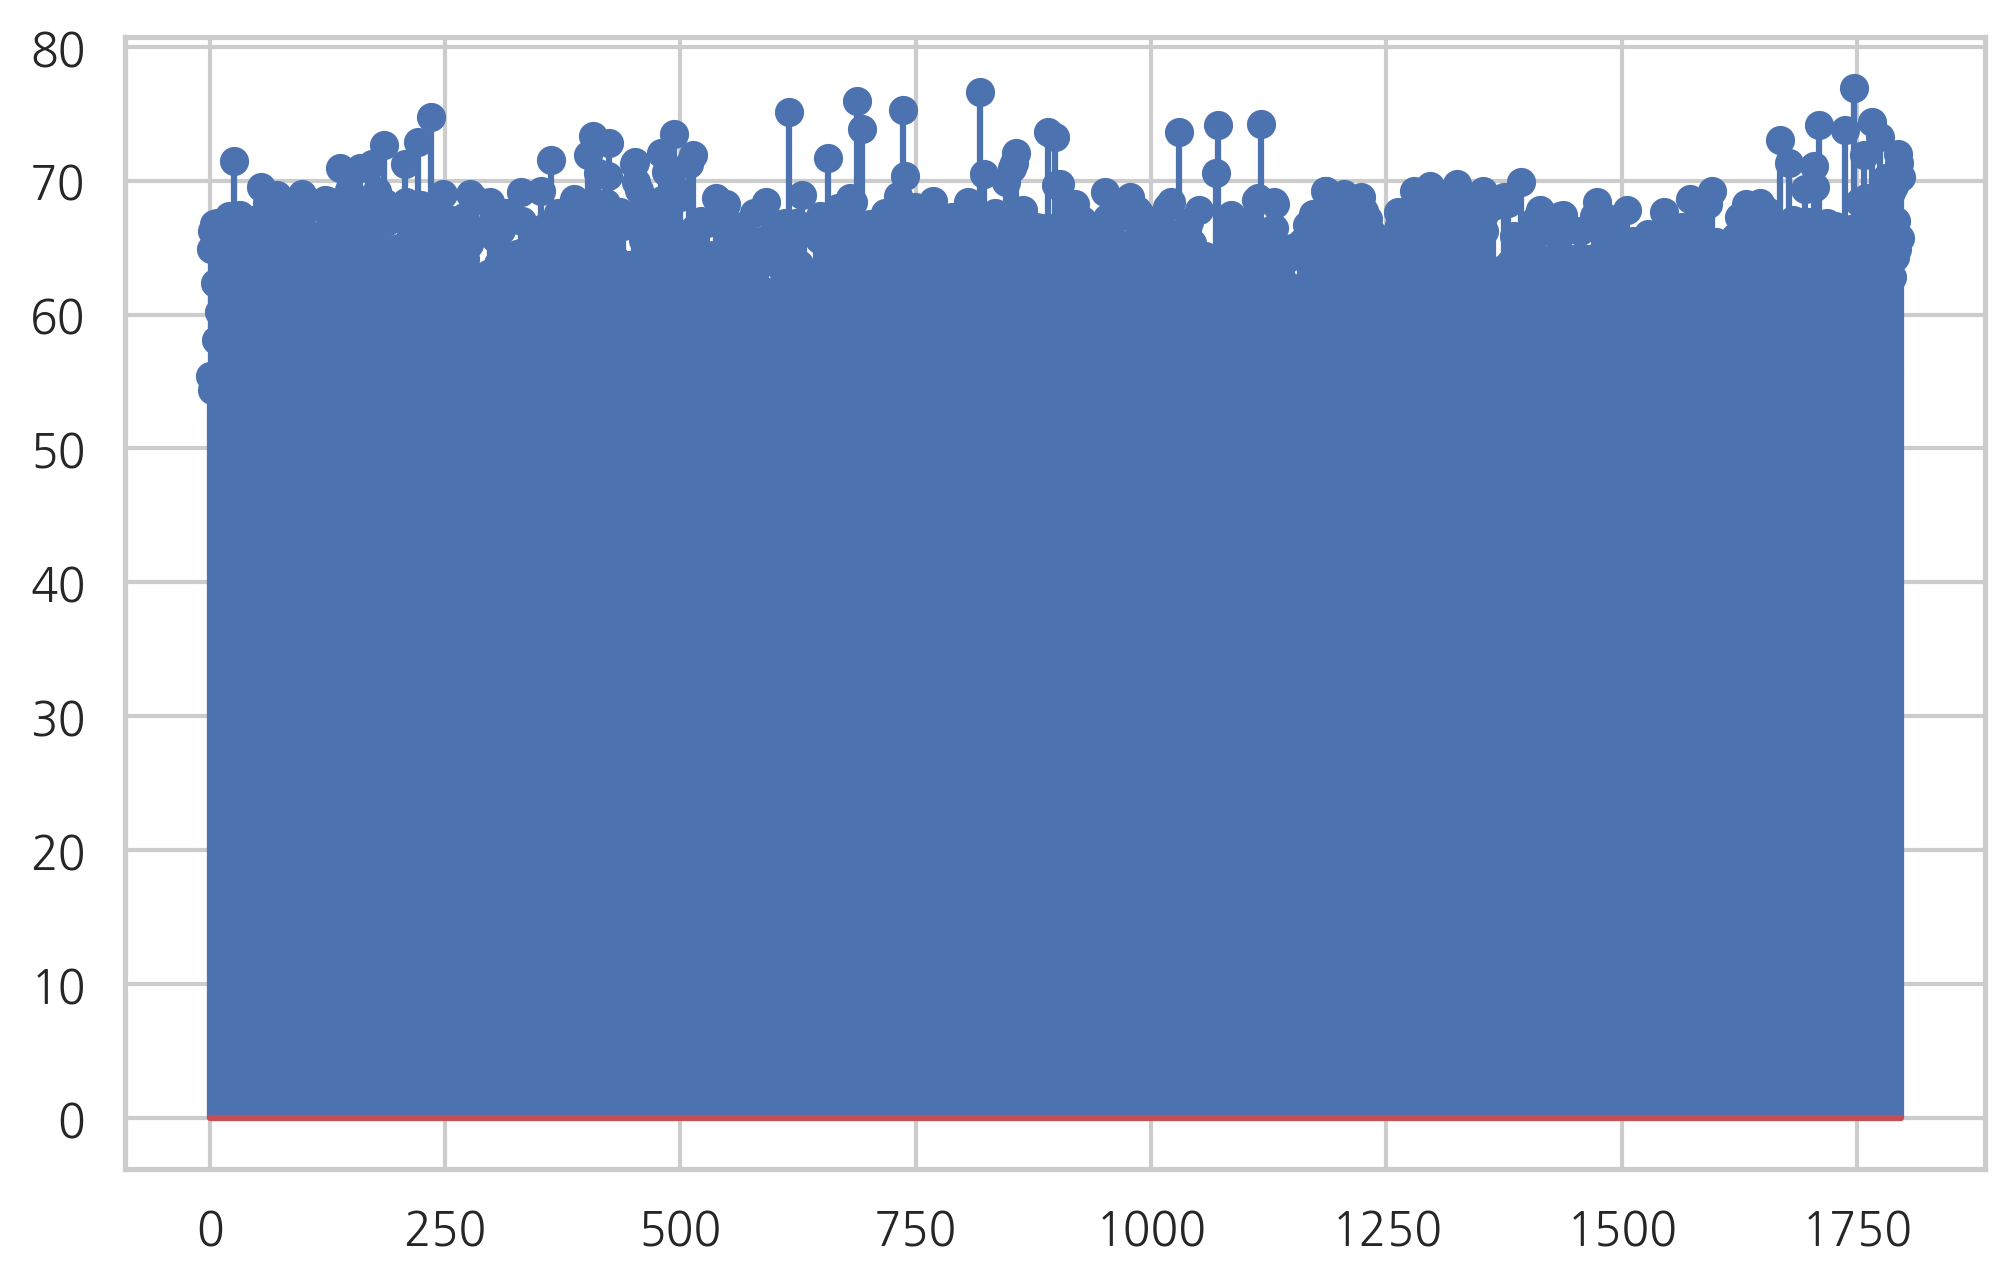

In [32]:
from sklearn.datasets import load_digits
import matplotlib.gridspec as gridspec

digits = load_digits().images
digits_images = [digits[i] for i in np.arange(1797)]

norms = []
for i in np.arange(1797) : 
    v = digits[i].reshape(64,1)
    norms.append(np.linalg.norm(v))

plt.stem(norms)

# 결과 : digits데이터의 모든 벡터 값들은 놈 값이 같았다. 곧, 모든 벡터 길이가 비슷비슷했다. 

In [263]:
# 코사인유사도 함수 
def calc_cos(a,b) : 
    return (a.T@b)/(np.linalg.norm(a)*np.linalg.norm(b))

In [268]:
v1 = digits[0].reshape(64,1)
v2 = digits[10].reshape(64,1)
v3 = digits[1].reshape(64,1)
v4 = digits[11].reshape(64,1)

print(calc_cos(v1, v2)[0][0])
print(calc_cos(v3, v4)[0][0])

0.9191053370251786
0.8558850606827169


In [277]:
print((v1.T@v2)[0][0], (v3.T@v4)[0][0])
print((v1.T@v4)[0][0], (v1.T@v3)[0][0])
print((v2.T@v3)[0][0], (v2.T@v4)[0][0])

3064.0 3661.0
1883.0 1866.0
2421.0 2479.0


In [272]:
print(calc_cos(v1, v3)[0][0])
print(calc_cos(v1, v4)[0][0])
print(calc_cos(v2, v3)[0][0])
print(calc_cos(v2, v4)[0][0])

0.5191023426414686
0.5154497249105311
0.6202275328139769
0.6249243129435831


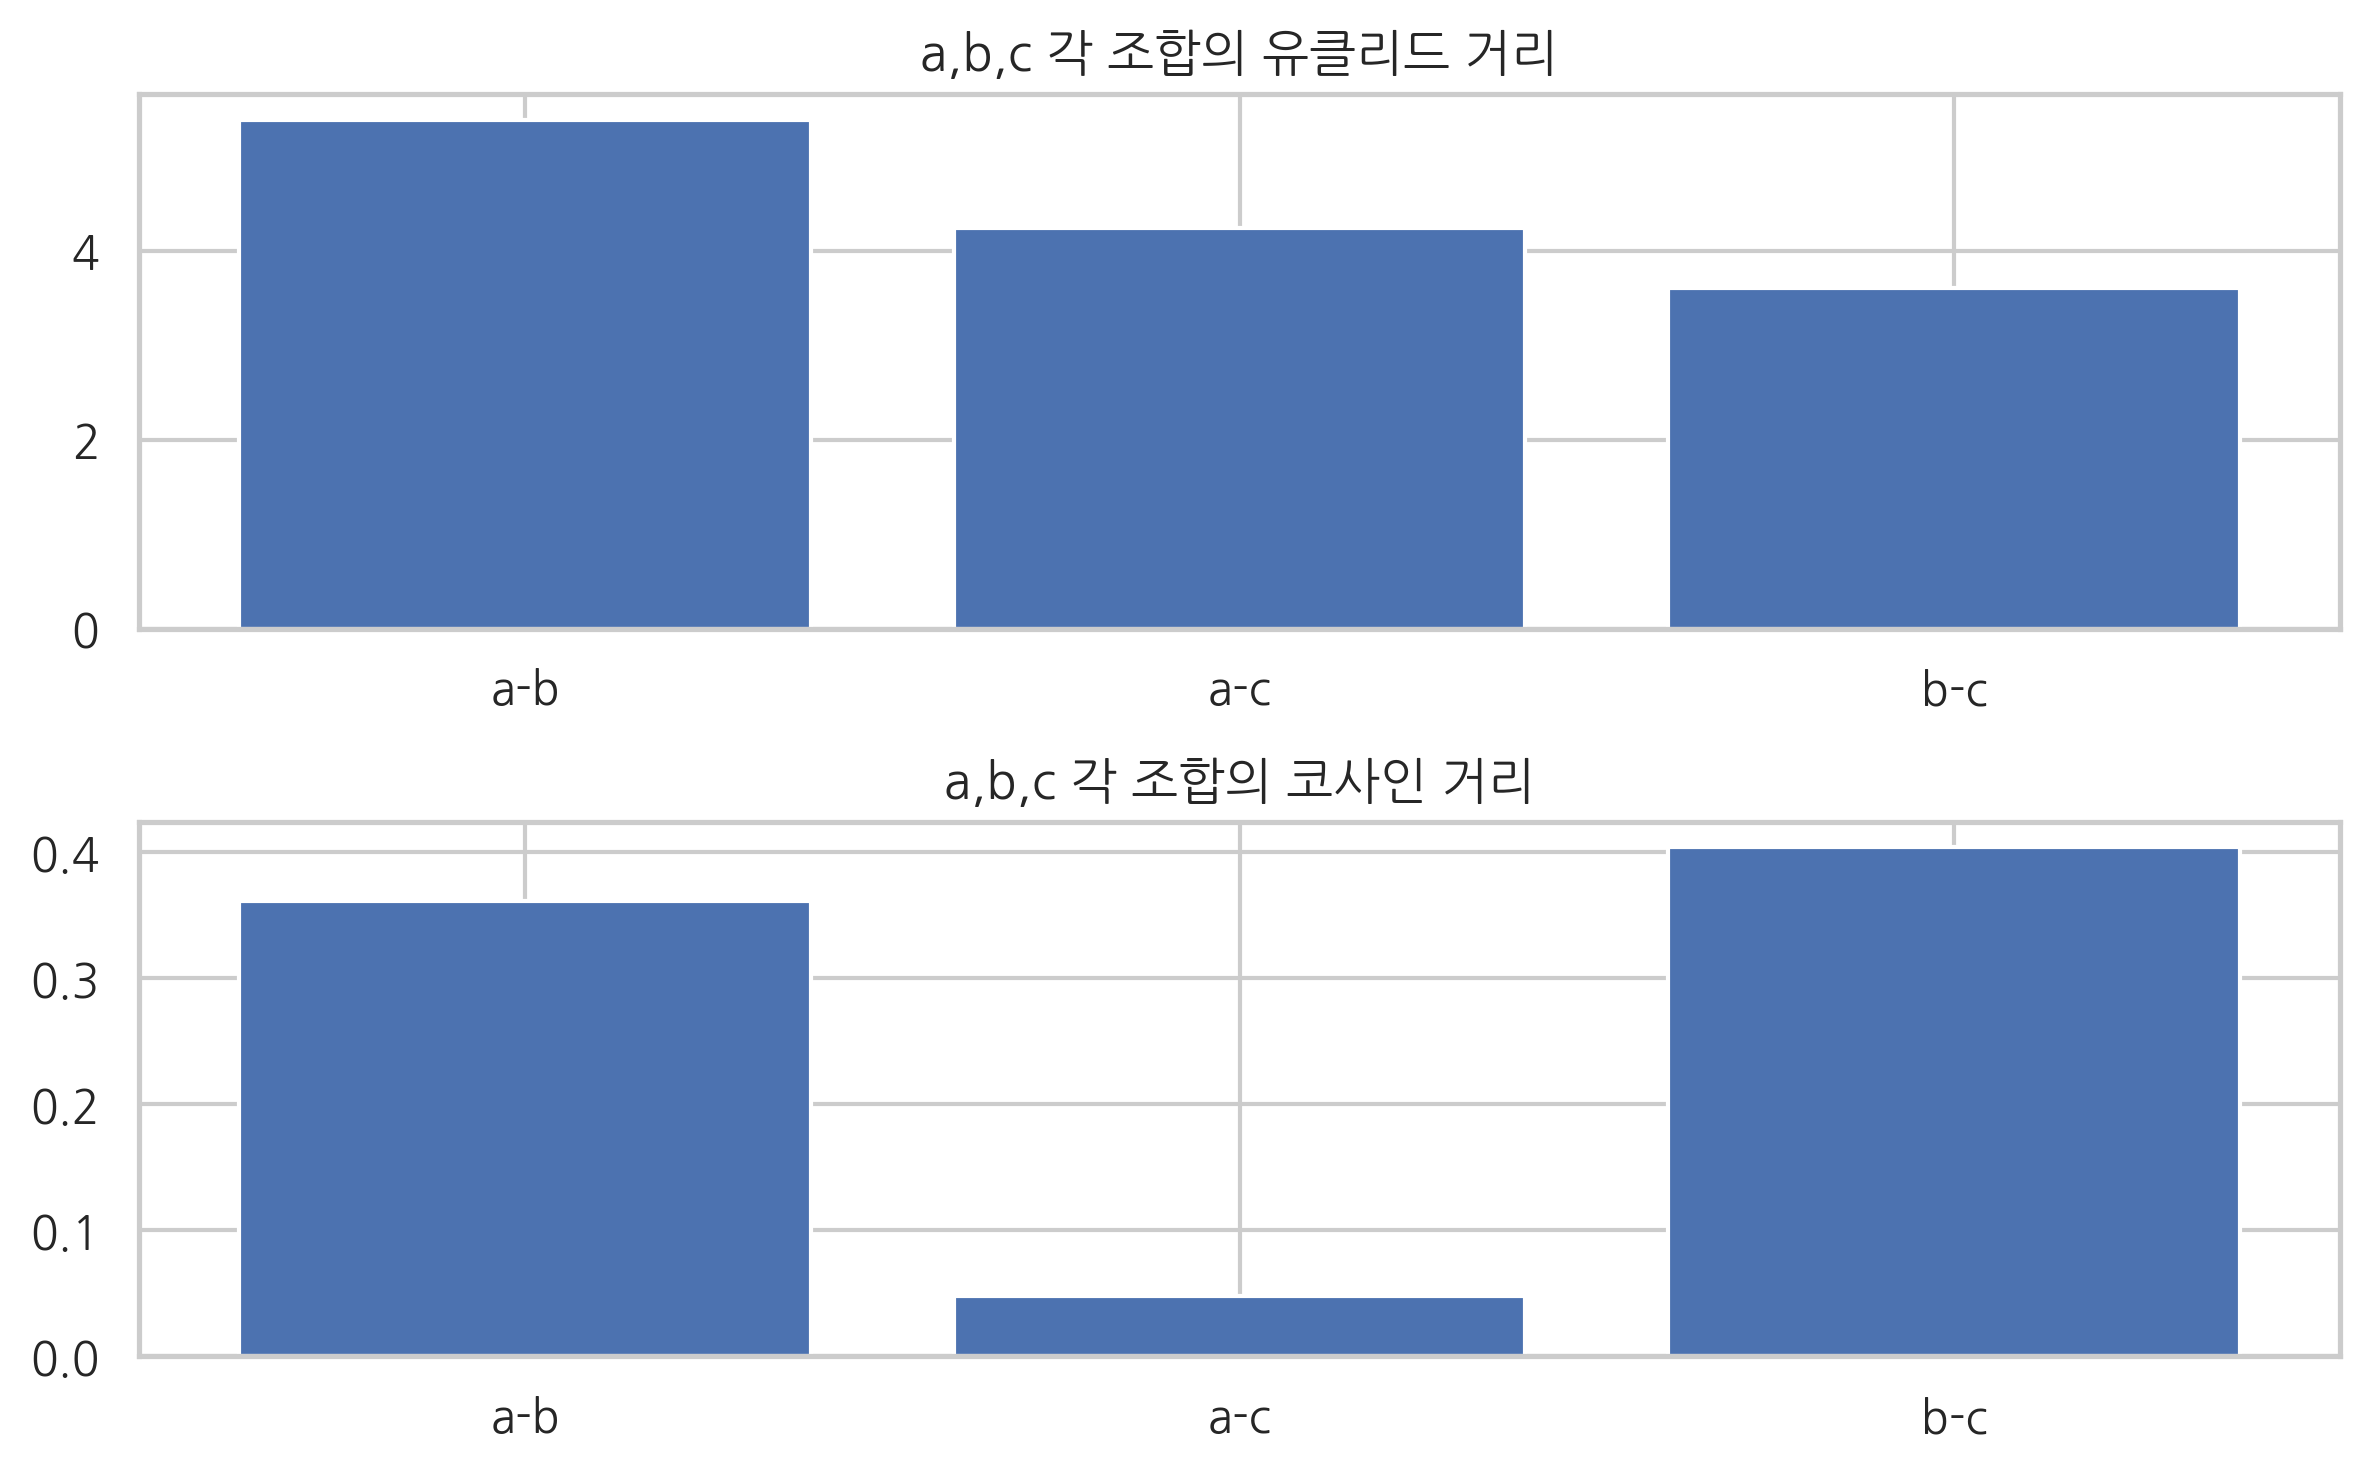

,유클리드 거리,코사인 거리
a-b,5.385165,0.361123
a-c,4.242641,0.047619
b-c,3.605551,0.403715


In [129]:
# 3.1.6 연습문제 

a = np.array([4,5,2,2])
b = np.array([4,0,2,0])
c = np.array([2,2,0,1])

# 유클리드 거리 : 두 벡터 길이, 방향 모두 감안해서 단순 비교 
def uclid_distance(x,y) :
    return np.sqrt(np.linalg.norm(x)**2+np.linalg.norm(y)**2-2*x@y)

uclid_list = []
for x, y in [(a,b),(a,c),(b,c)] : 
    uclid_list.append(uclid_distance(x,y))

plt.subplot(211)
plt.bar(['a-b','a-c','b-c'], uclid_list)
plt.title('a,b,c 각 조합의 유클리드 거리')

# 2. 코사인 거리 
def cos_distance(x,y) : 
    return 1-((x@y)/(np.linalg.norm(x)*np.linalg.norm(y)))

cos_list = []
for x,y in [(a,b),(a,c),(b,c)] : 
    cos_list.append(cos_distance(x,y))

plt.subplot(212)
plt.bar(['a-b', 'a-c', 'b-c'], cos_list)
plt.title('a,b,c 각 조합의 코사인 거리')

plt.tight_layout()
plt.show()

pd.DataFrame({
    '유클리드 거리' : uclid_list,
    '코사인 거리' : cos_list
}, index= ['a-b','a-c','b-c'])

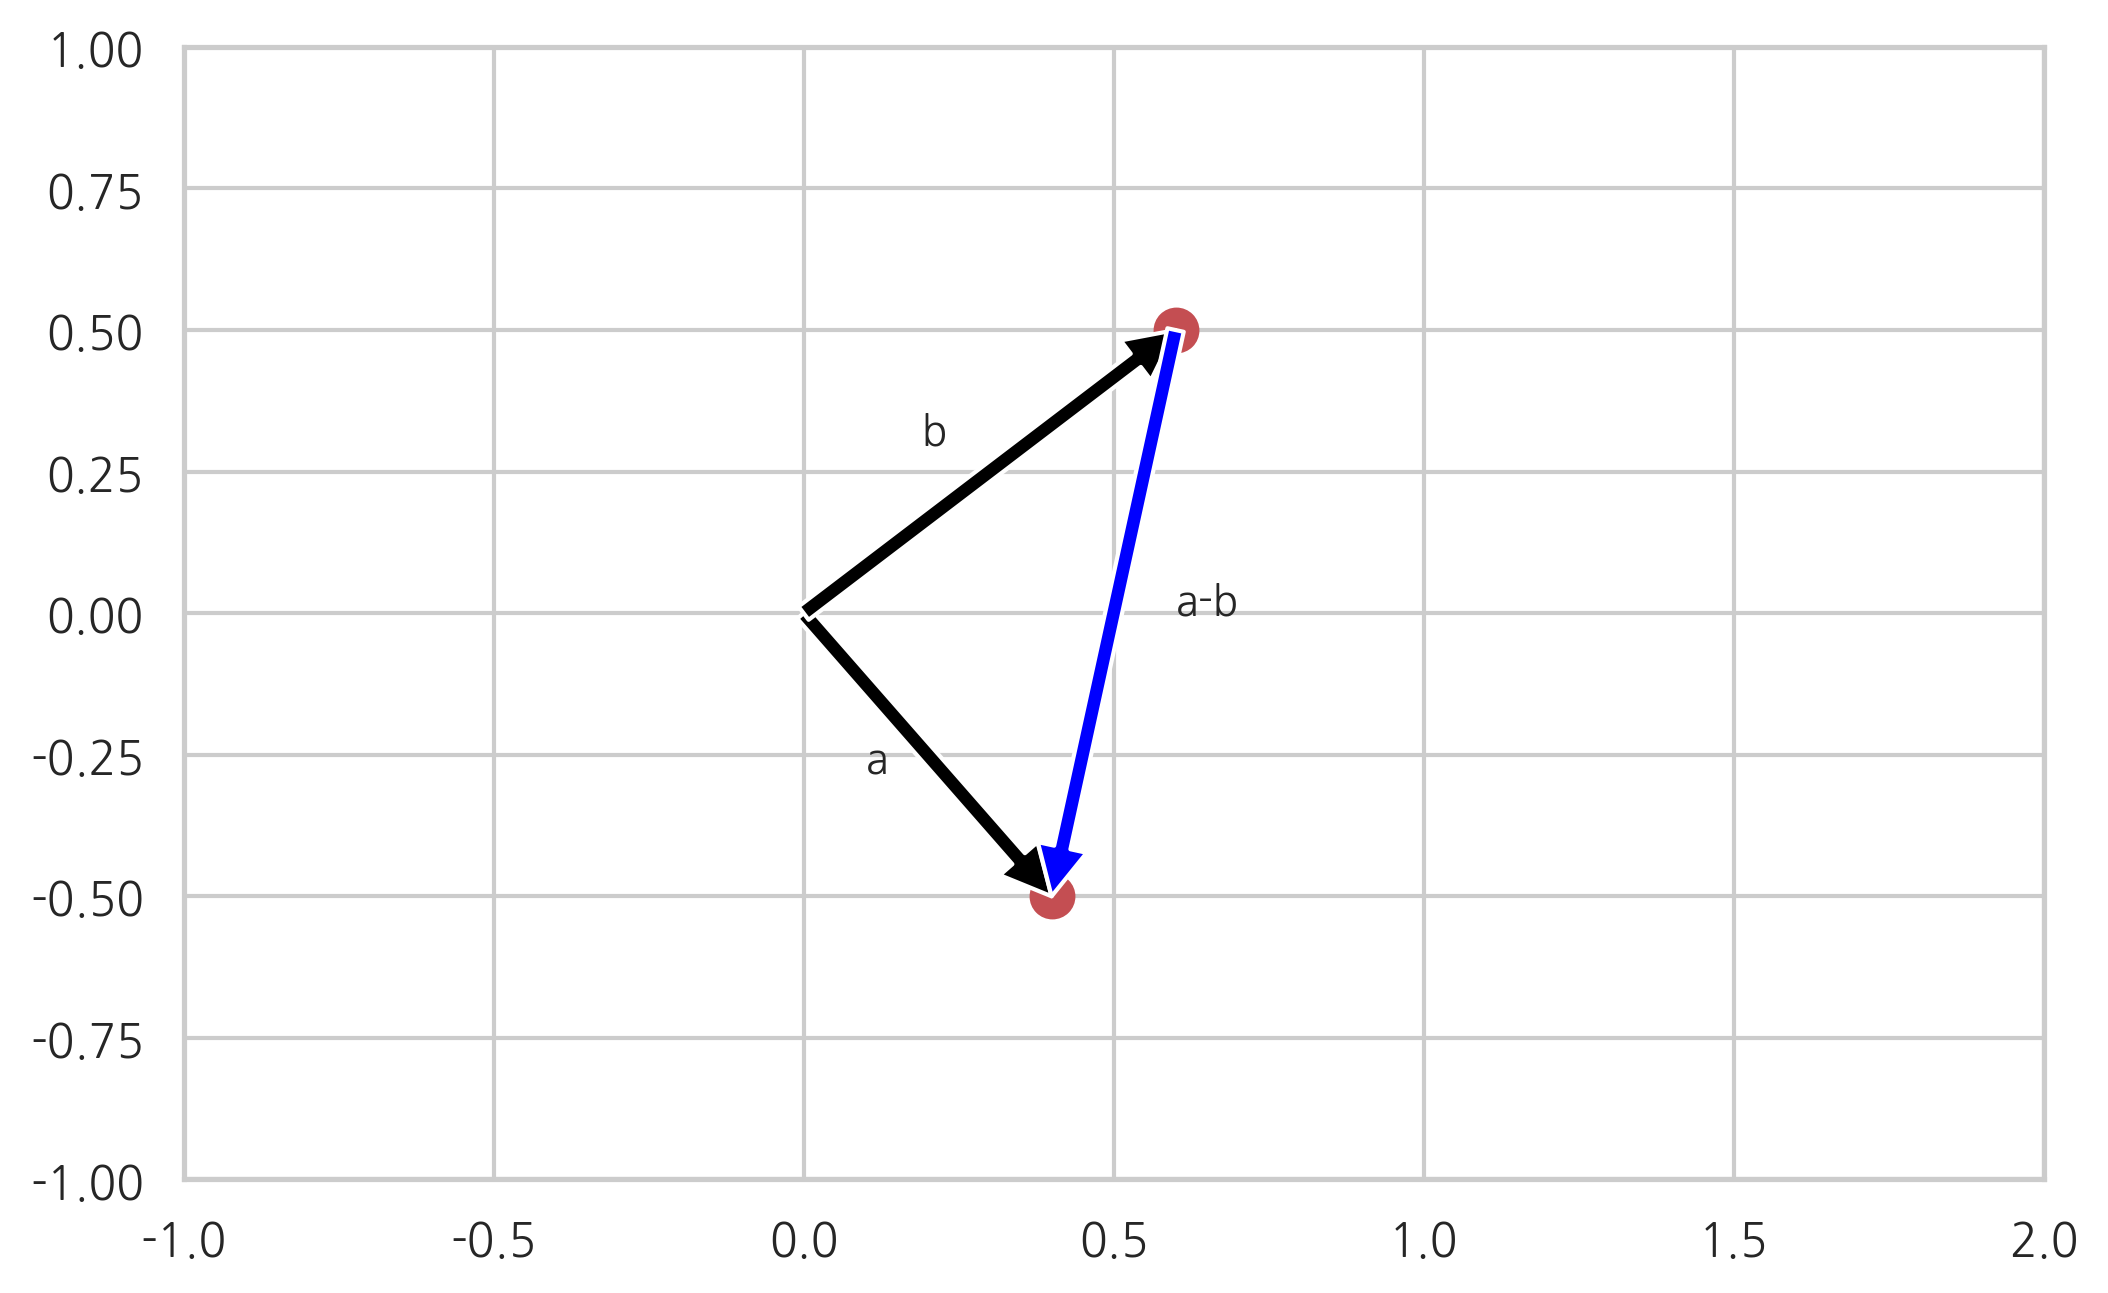

In [237]:
# 벡터 차
plt.ylim(-1,1)
plt.xlim(-1,2)
black = {'facecolor' : 'black'}
blue = {'facecolor' : 'blue'}
plt.annotate('', xy=[2/5, -1/2], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[3/5,1/2], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[2/5, -1/2], xytext=[3/5, 1/2], arrowprops=blue)

plt.text(0.1, -0.28, 'a')
plt.text(0.19, 0.3, 'b')
plt.text(0.6, 0.0, 'a-b')
plt.scatter(2/5, -1/2, 100, 'r')
plt.scatter(3/5,1/2, 100, 'r')
plt.show()

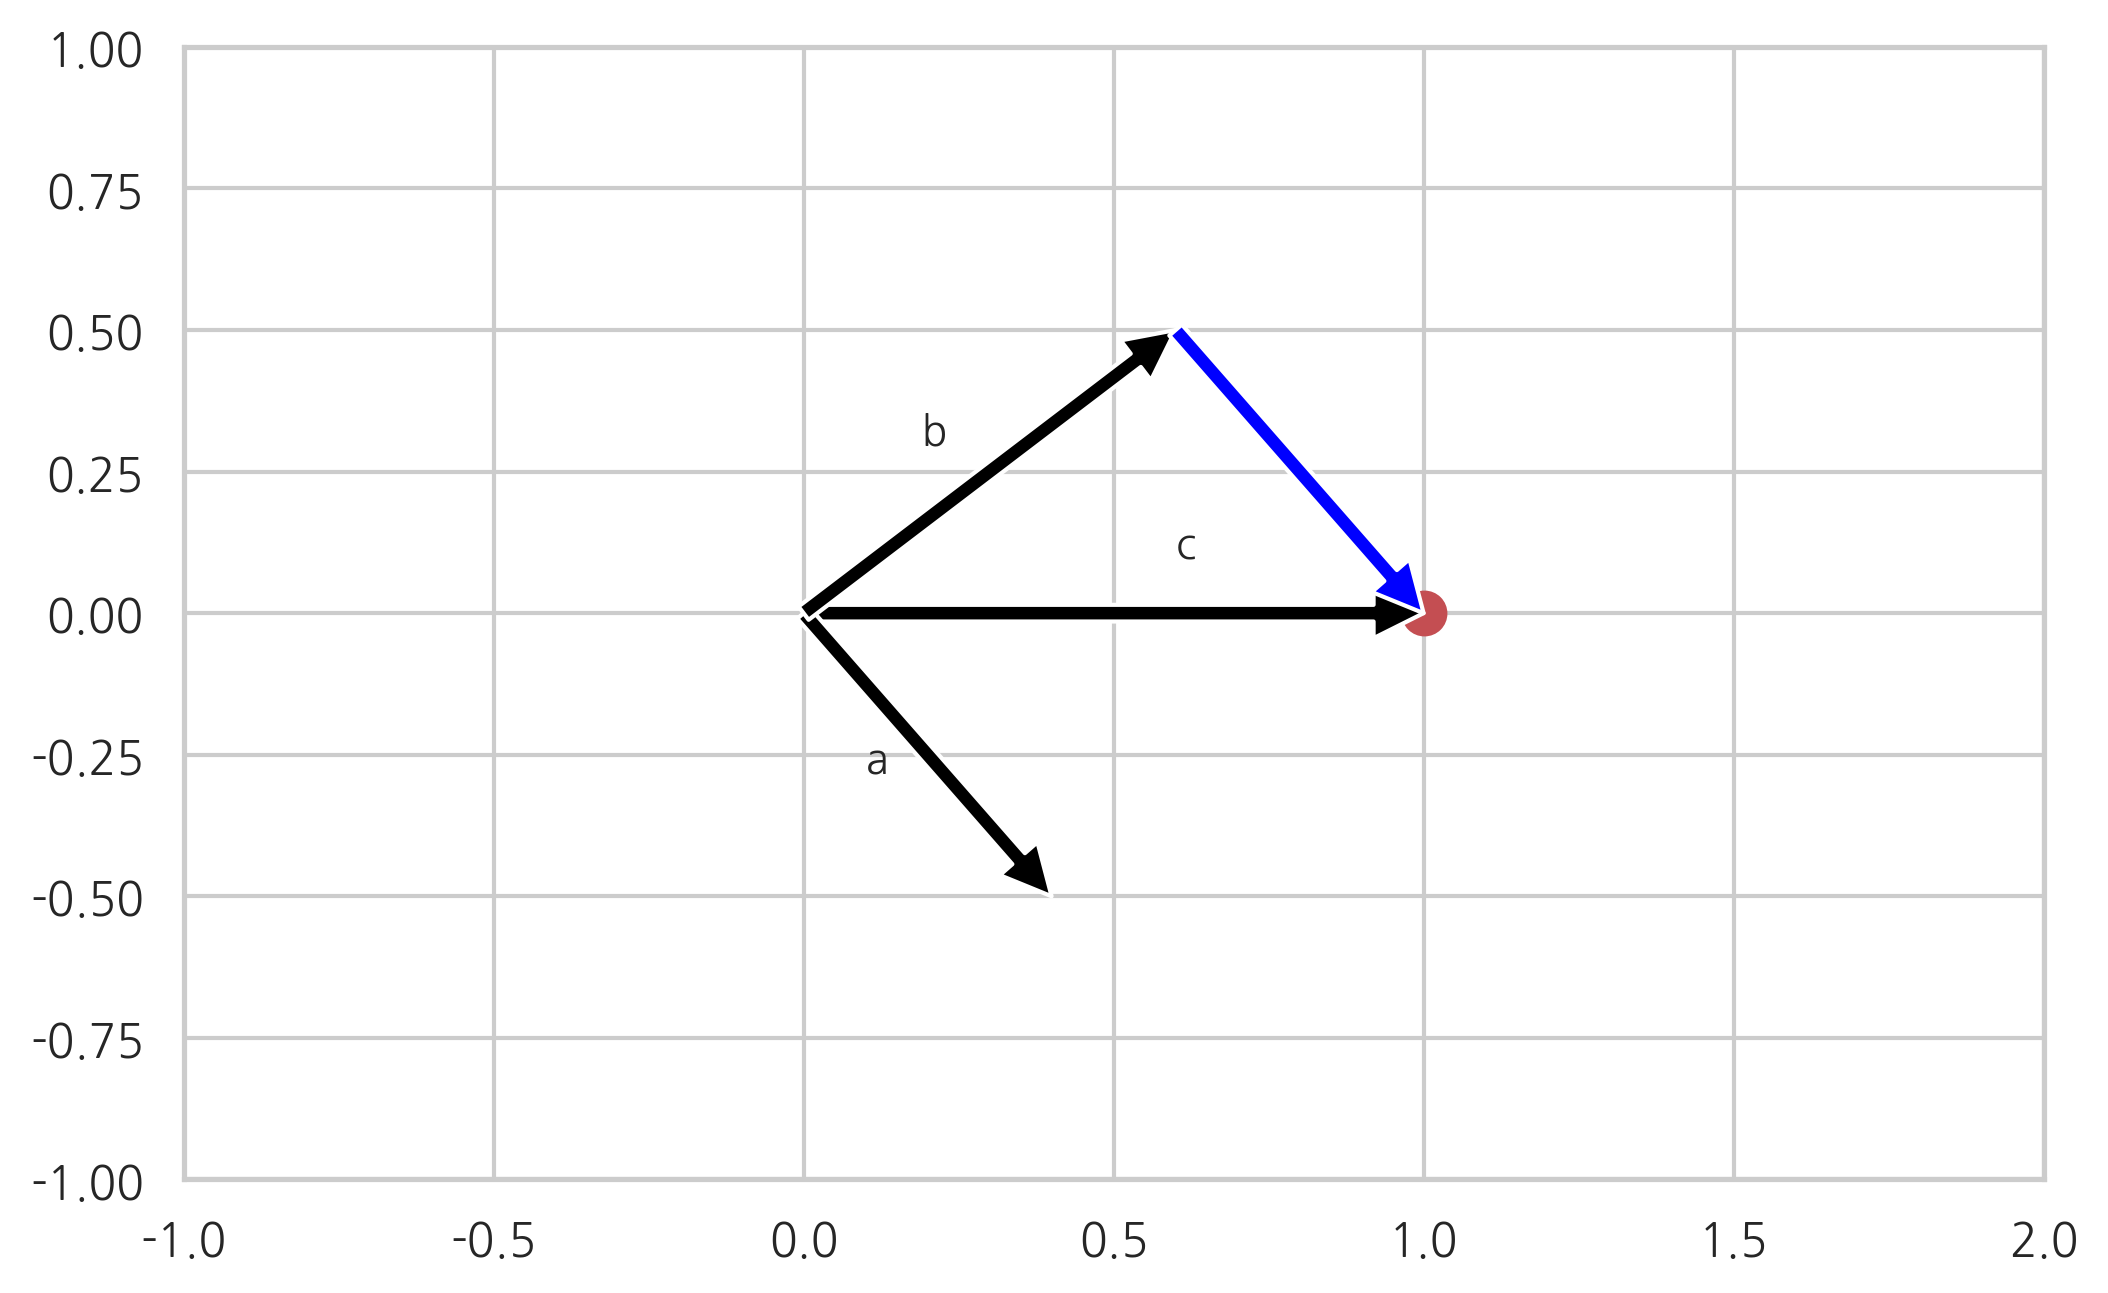

In [221]:
# 3.1.7 연습문제 
plt.ylim(-1,1)
plt.xlim(-1,2)
black = {'facecolor' : 'black'}
blue = {'facecolor' : 'blue'}
plt.annotate('', xy=[1,0], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[2/5, -1/2], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[3/5,1/2], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[1,0], xytext=[3/5, 1/2], arrowprops=blue)
plt.scatter(1,0, 100, 'r')
plt.text(0.1, -0.28, 'a')
plt.text(0.19, 0.3, 'b')
plt.text(0.6, 0.1, 'c')
plt.show()

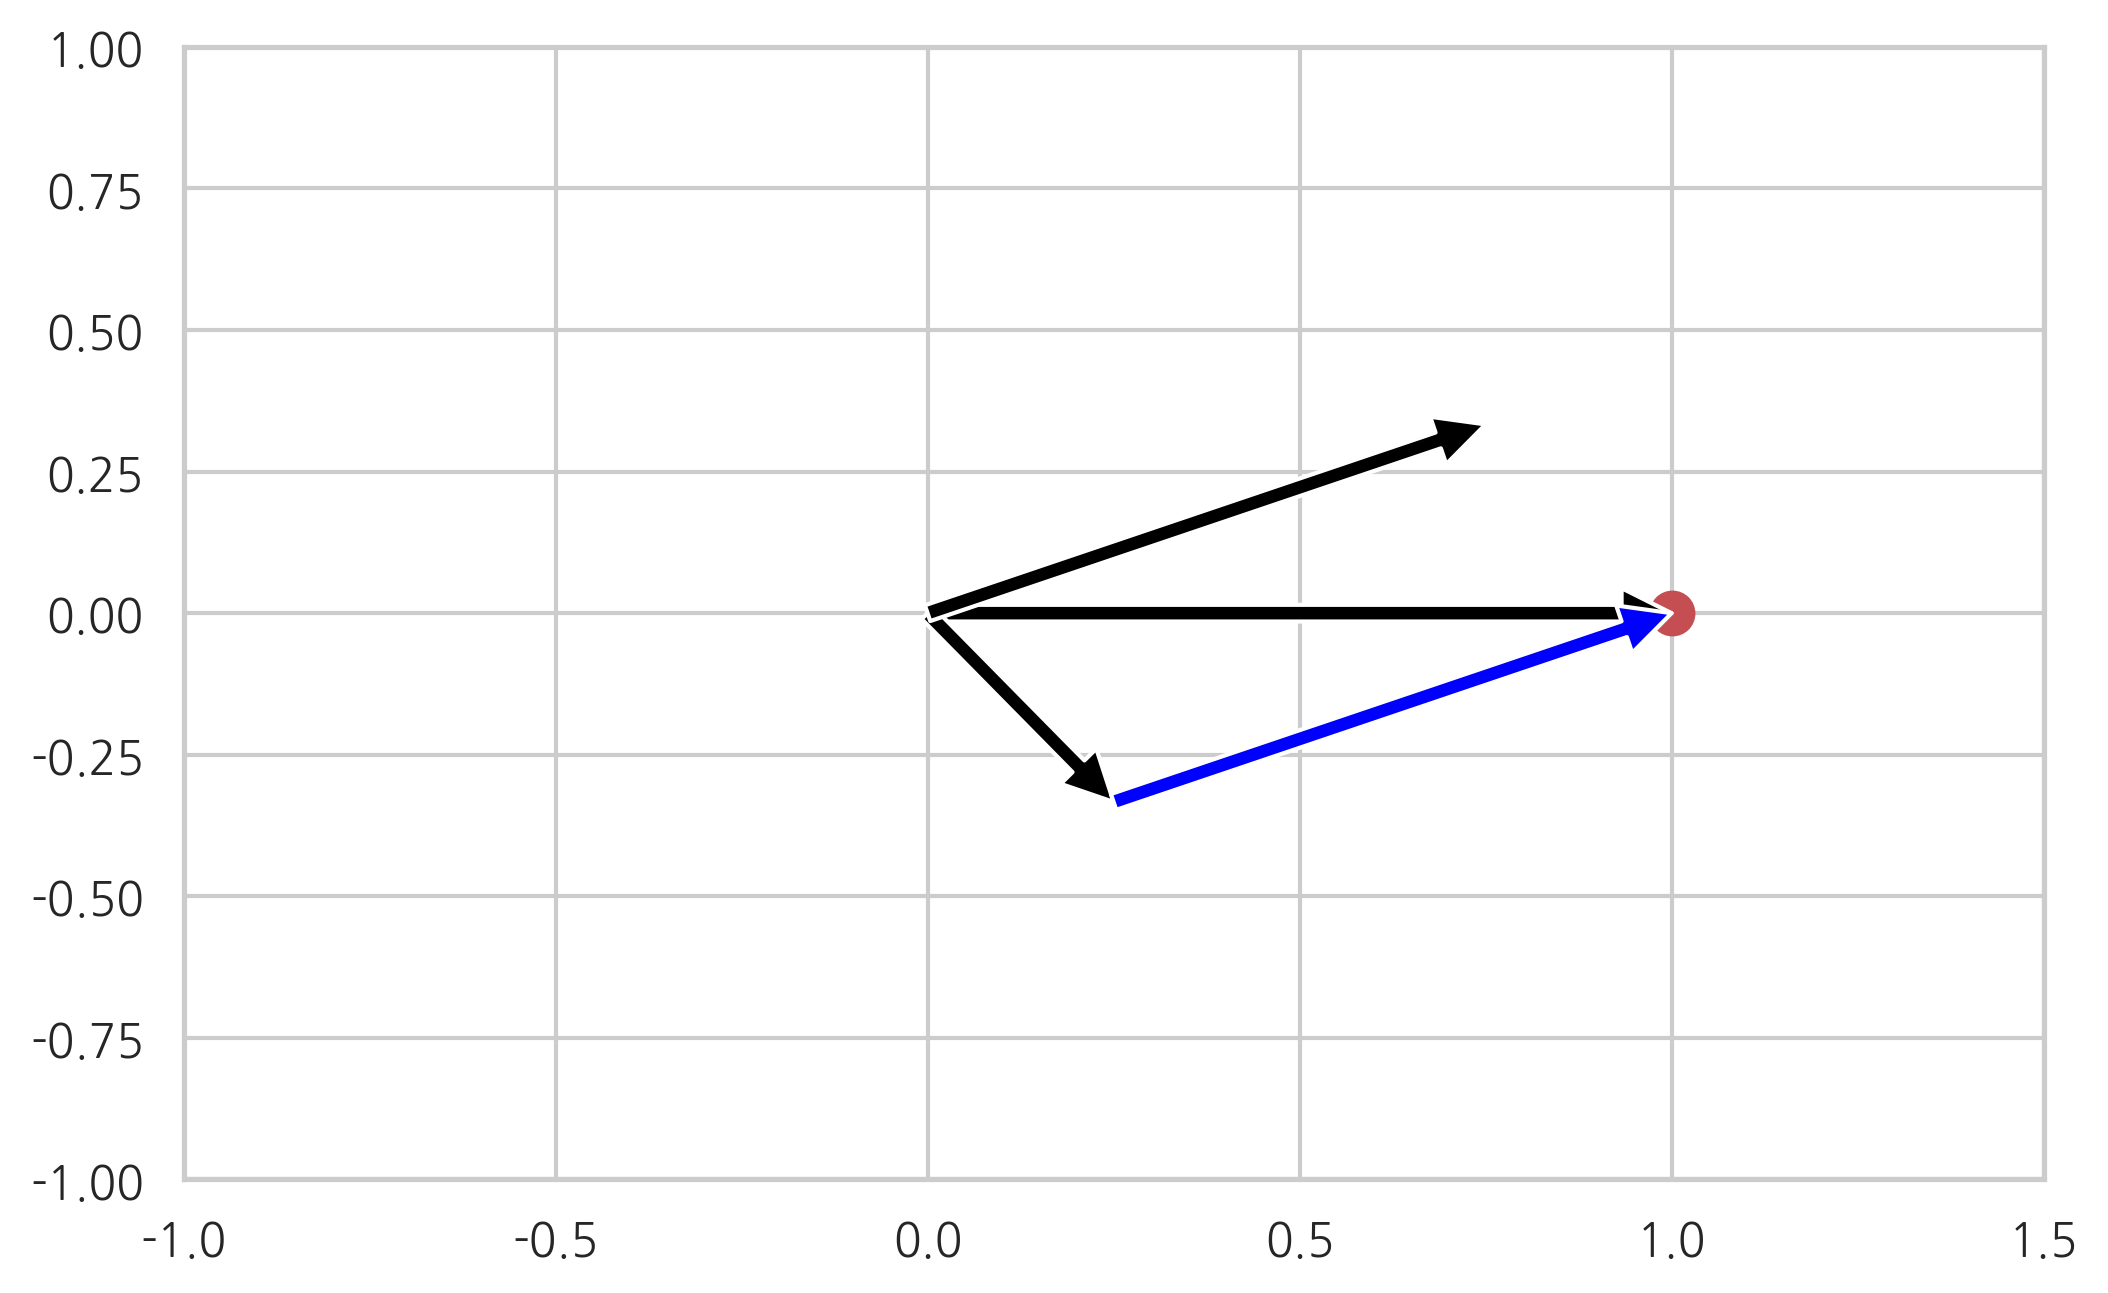

In [157]:
plt.ylim(-1,1)
plt.xlim(-1, 1.5)
plt.annotate('', xy=[1,0], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[1/4, -1/3], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[3/4, 1/3], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[1,0], xytext=[1/4, -1/3], arrowprops=blue)
plt.scatter(1,0, 100, 'r')
plt.show()

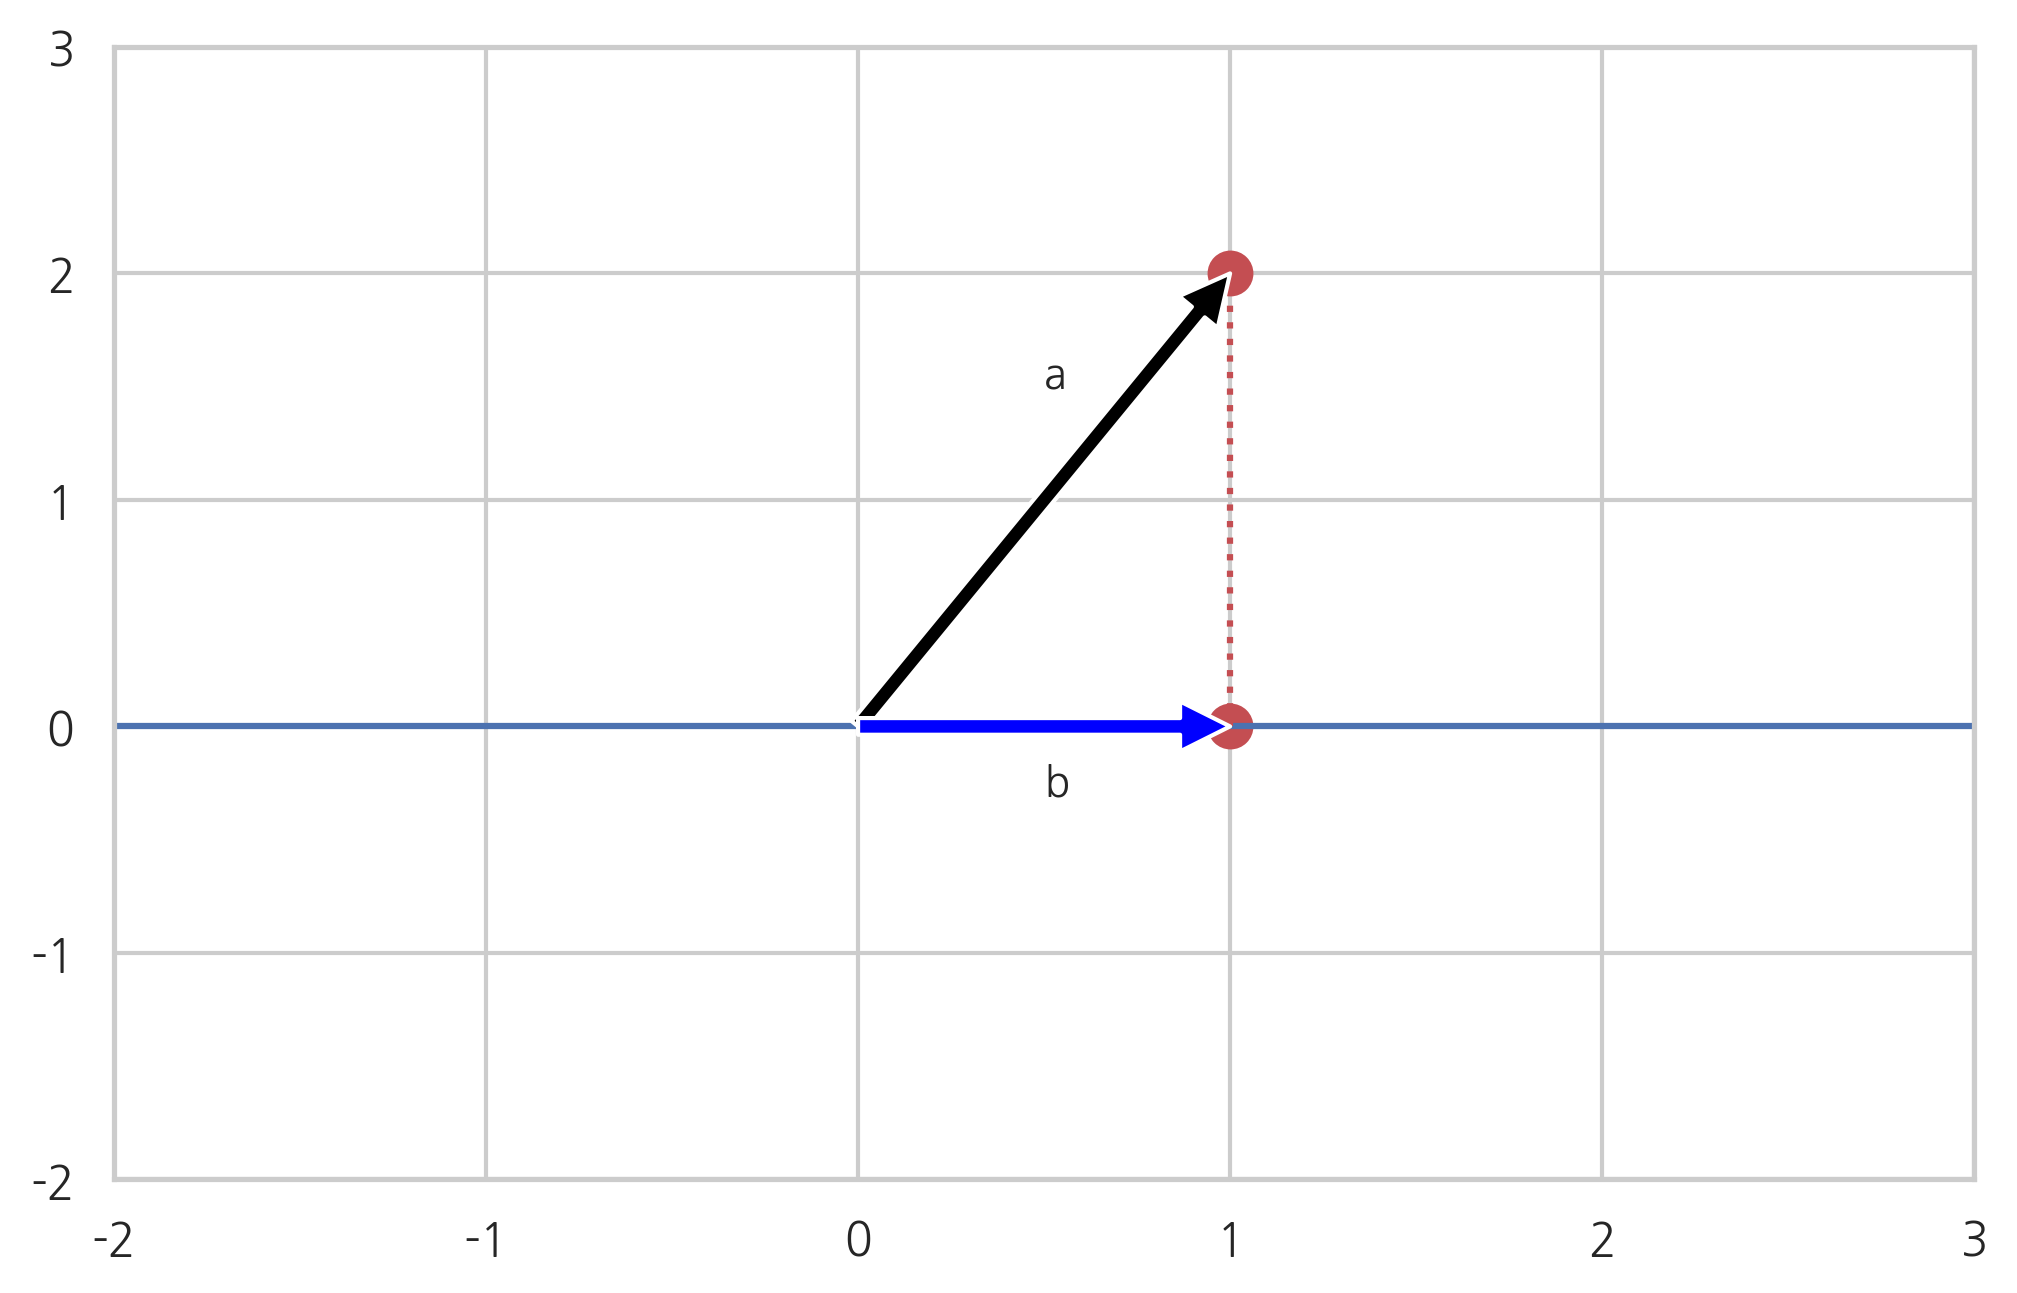

In [254]:
plt.ylim(-2,3)
plt.xlim(-2,3)
black = {'facecolor' : 'black'}
blue = {'facecolor' : 'blue'}

plt.annotate('', xy=[1,2], xytext=[0,0], arrowprops=black)
plt.text(0.5, 1.5, 'a')
plt.scatter(1,2, 100,'r')
plt.hlines(0, xmin=-2, xmax=3)
plt.annotate('', xy=[1,0], xytext=[0,0], arrowprops=blue)
plt.text(0.5, -0.3, 'b')
plt.scatter(1,0, 100,'r')
plt.vlines(1, ymin=0, ymax=2, ls=':', colors='r')

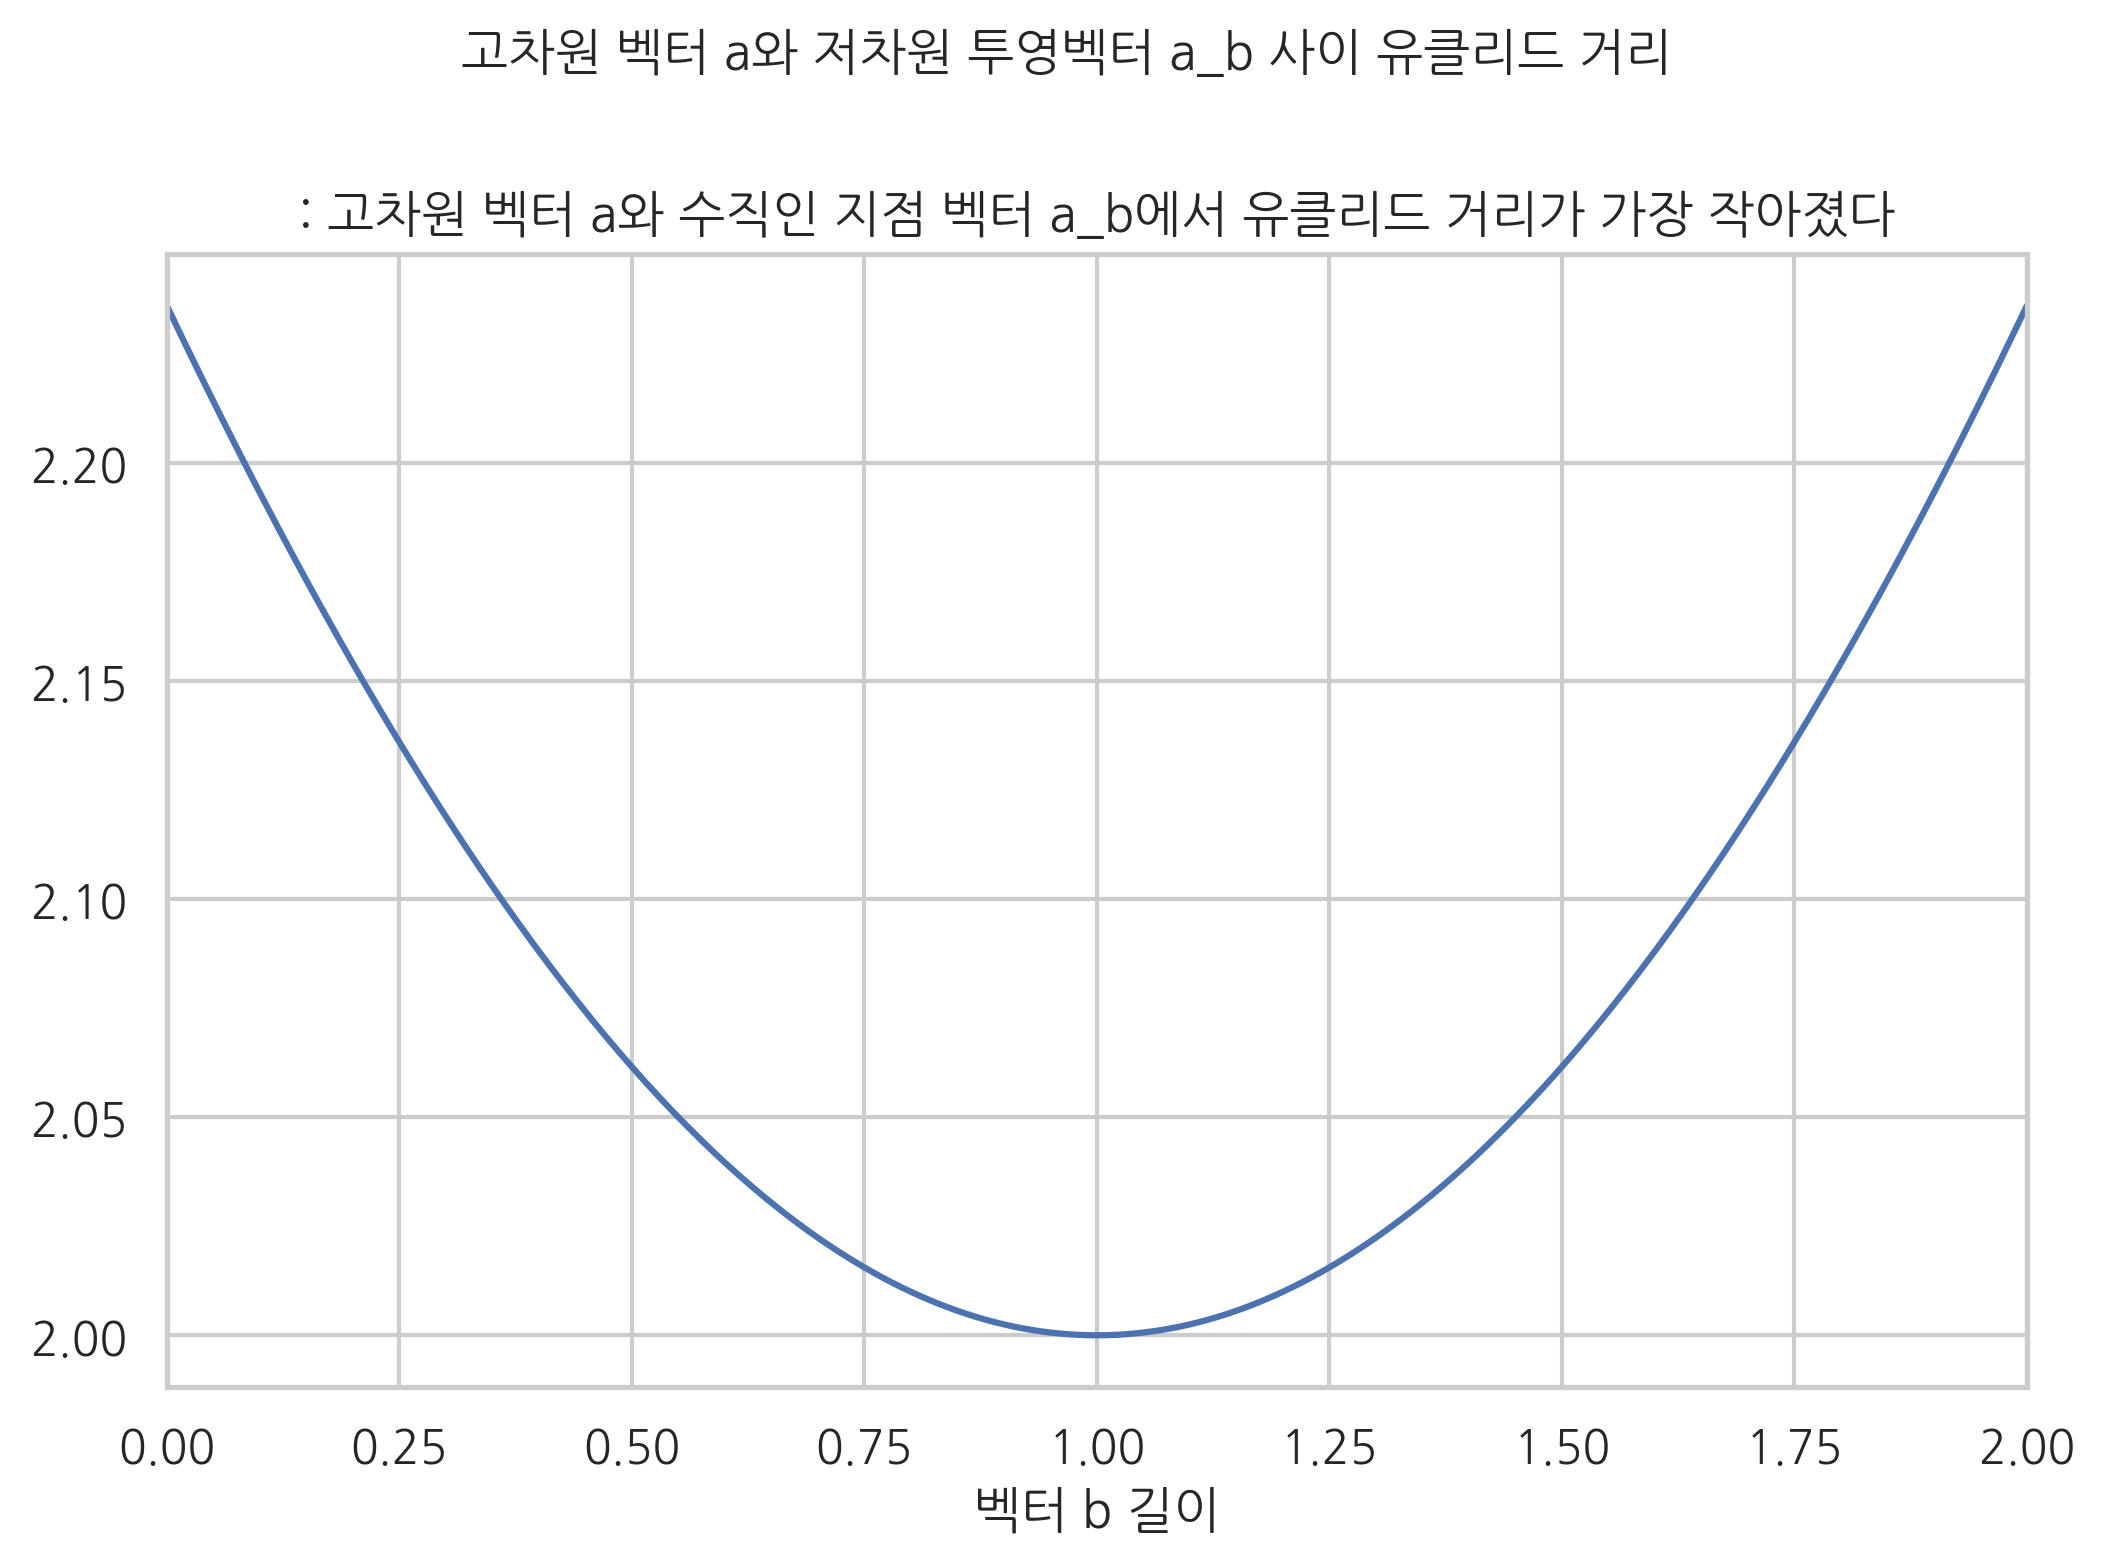

In [256]:
xx = np.arange(0,2+0.005, 0.005)

def test(b) : 
    return np.sqrt(5+(b**2)-2*np.sqrt(5)*b*(np.sqrt(5)/5)) 
tr = [test(b) for b in xx]
plt.plot(xx, tr)
plt.xlim(0,2)
plt.xlabel('벡터 b 길이')
plt.suptitle('고차원 벡터 a와 저차원 투영벡터 a_b 사이 유클리드 거리', y=1.03)
plt.title(': 고차원 벡터 a와 수직인 지점 벡터 a_b에서 유클리드 거리가 가장 작아졌다')
plt.show()

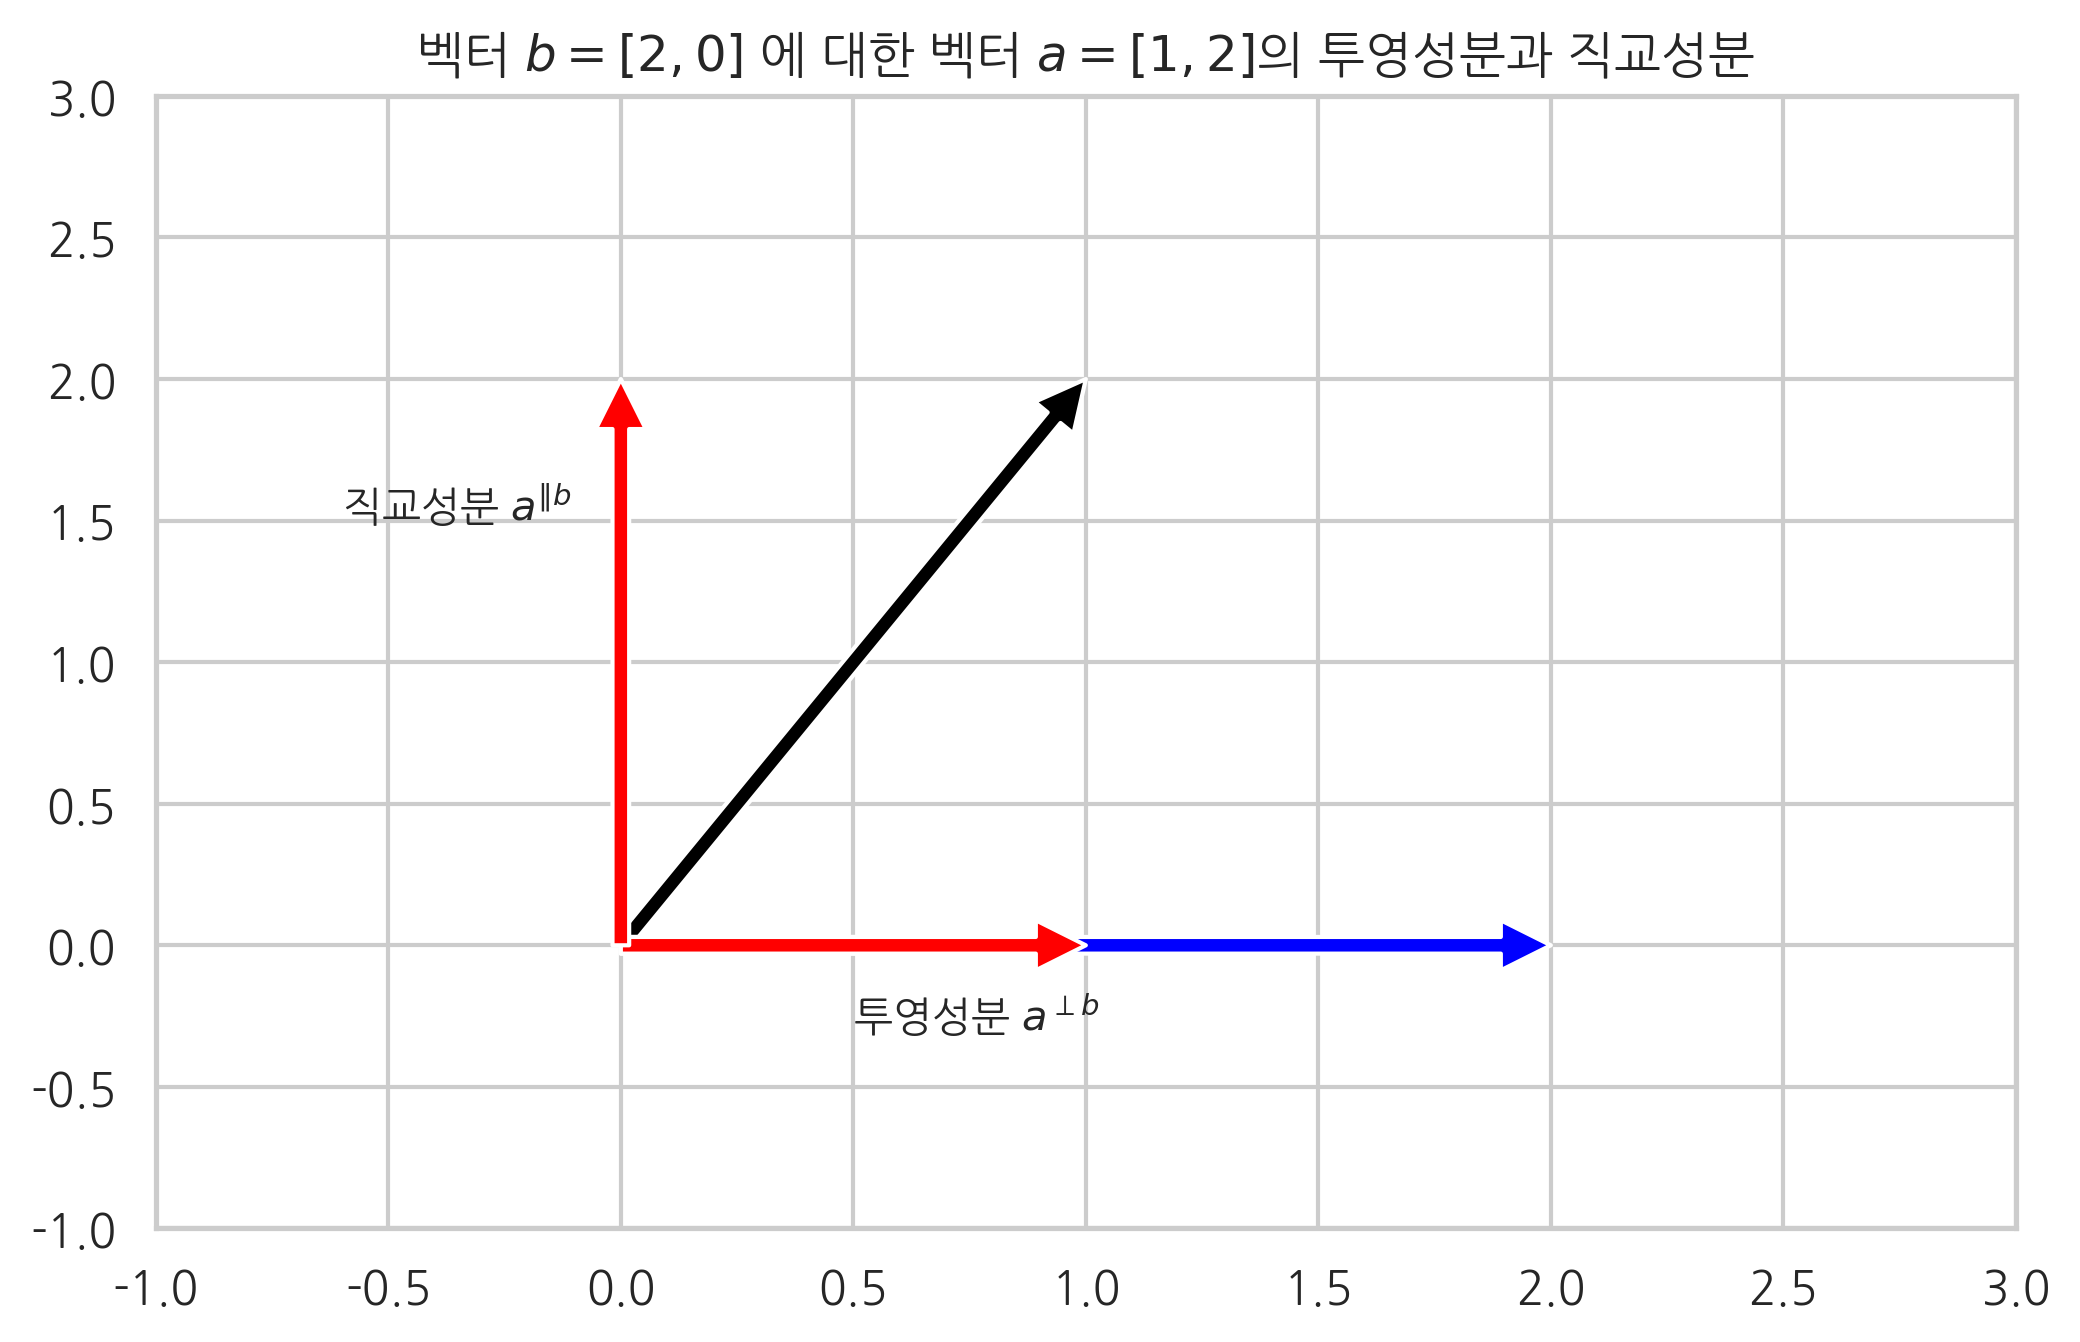

In [214]:
# 3.1.8 연습문제 
red = {'facecolor' : 'red'}
plt.xlim(-1,3)
plt.ylim(-1,3)
plt.annotate('', xy=[1,2], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[2,0], xytext=[0,0], arrowprops=blue)
plt.annotate('', xy=[1,0], xytext=[0,0], arrowprops=red)
plt.annotate('', xy=[0,2], xytext=[0,0], arrowprops=red)

plt.text(-0.6, 1.5, '직교성분 $a^{\Vert b}$')
plt.text(0.5, -0.3, '투영성분 $a^{\perp b}$')
plt.title('벡터 $b=[2,0]$ 에 대한 벡터 $a=[1,2]$의 투영성분과 직교성분')
plt.show()

# 벡터 선형종속과 선형독립

Text(0.5, 1.0, '선형종속')

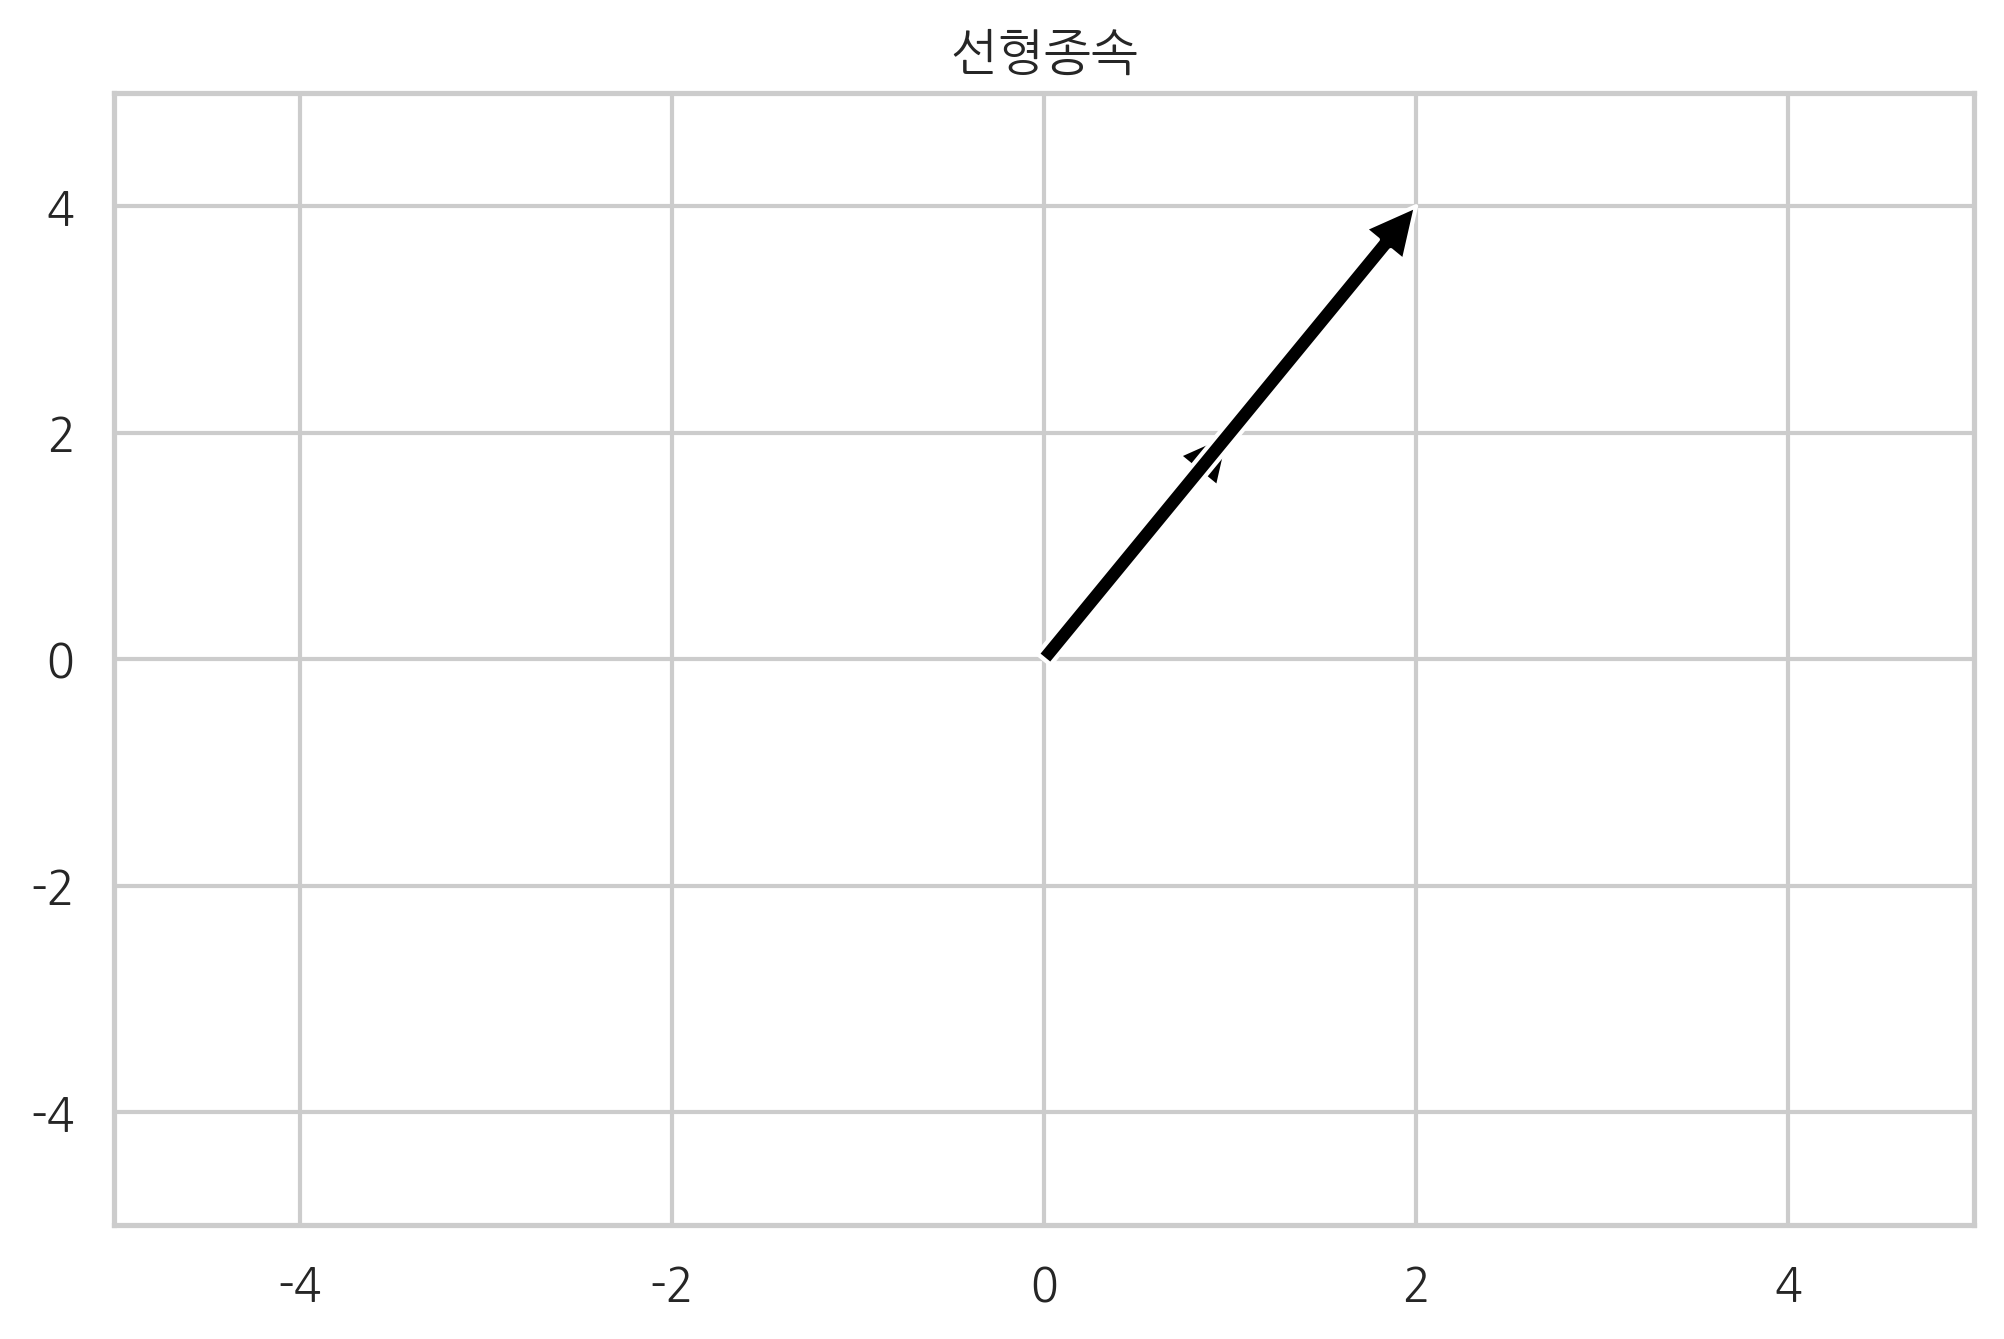

In [281]:
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.annotate('', xy=[1,2],xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[2,4], xytext=[0,0], arrowprops=black)
plt.title('선형종속')

Text(0, 0, '')

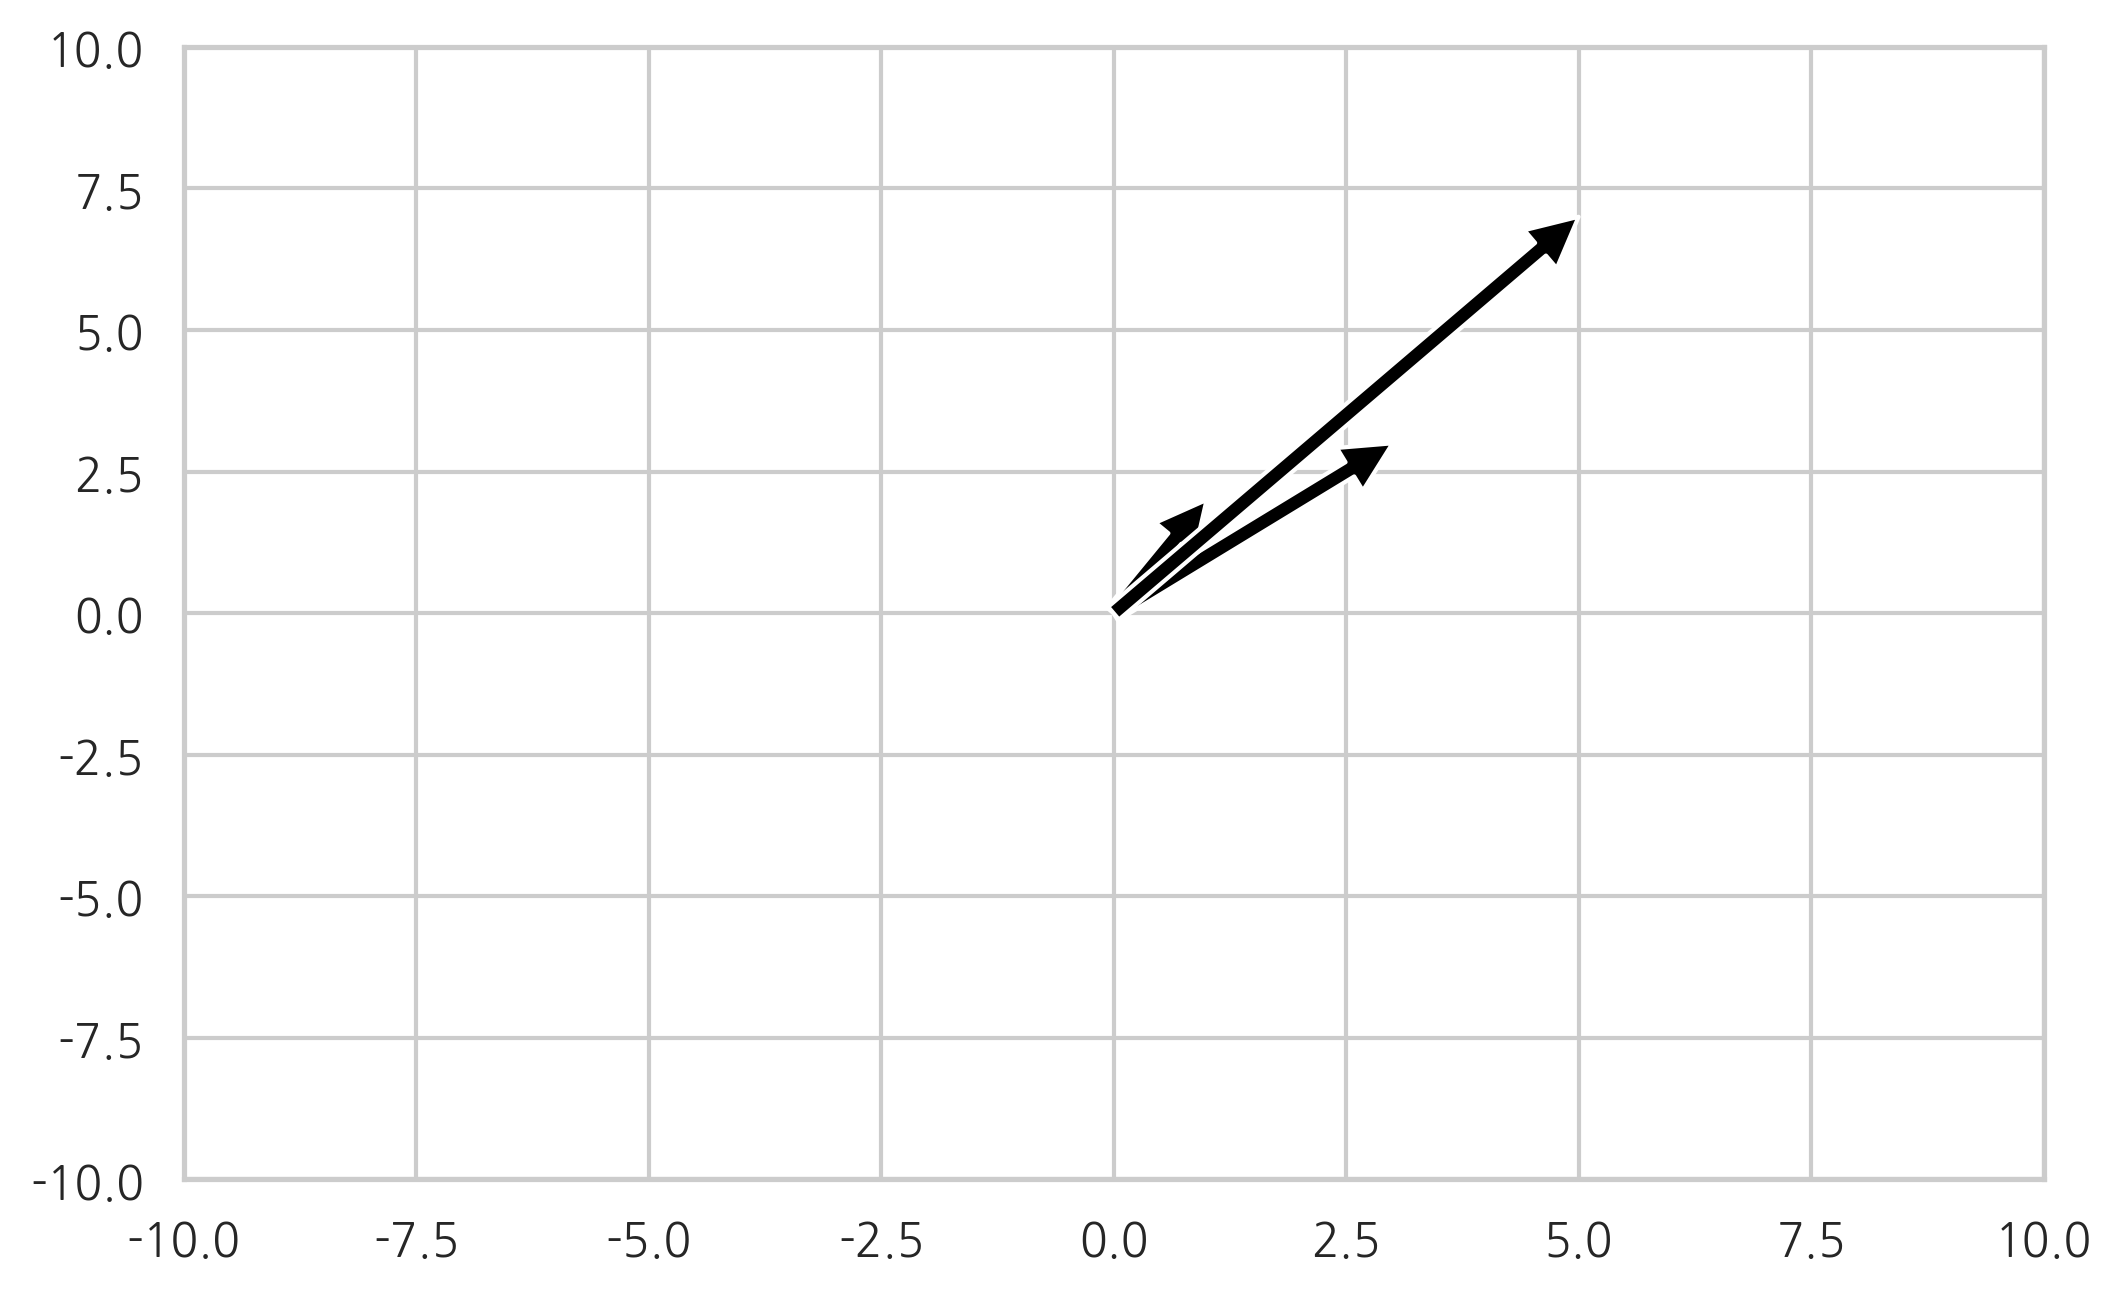

In [286]:
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.annotate('', xy=[1,2], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[3,3],xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[5,7], xytext=[0,0], arrowprops=black)

Text(0, 0, '')

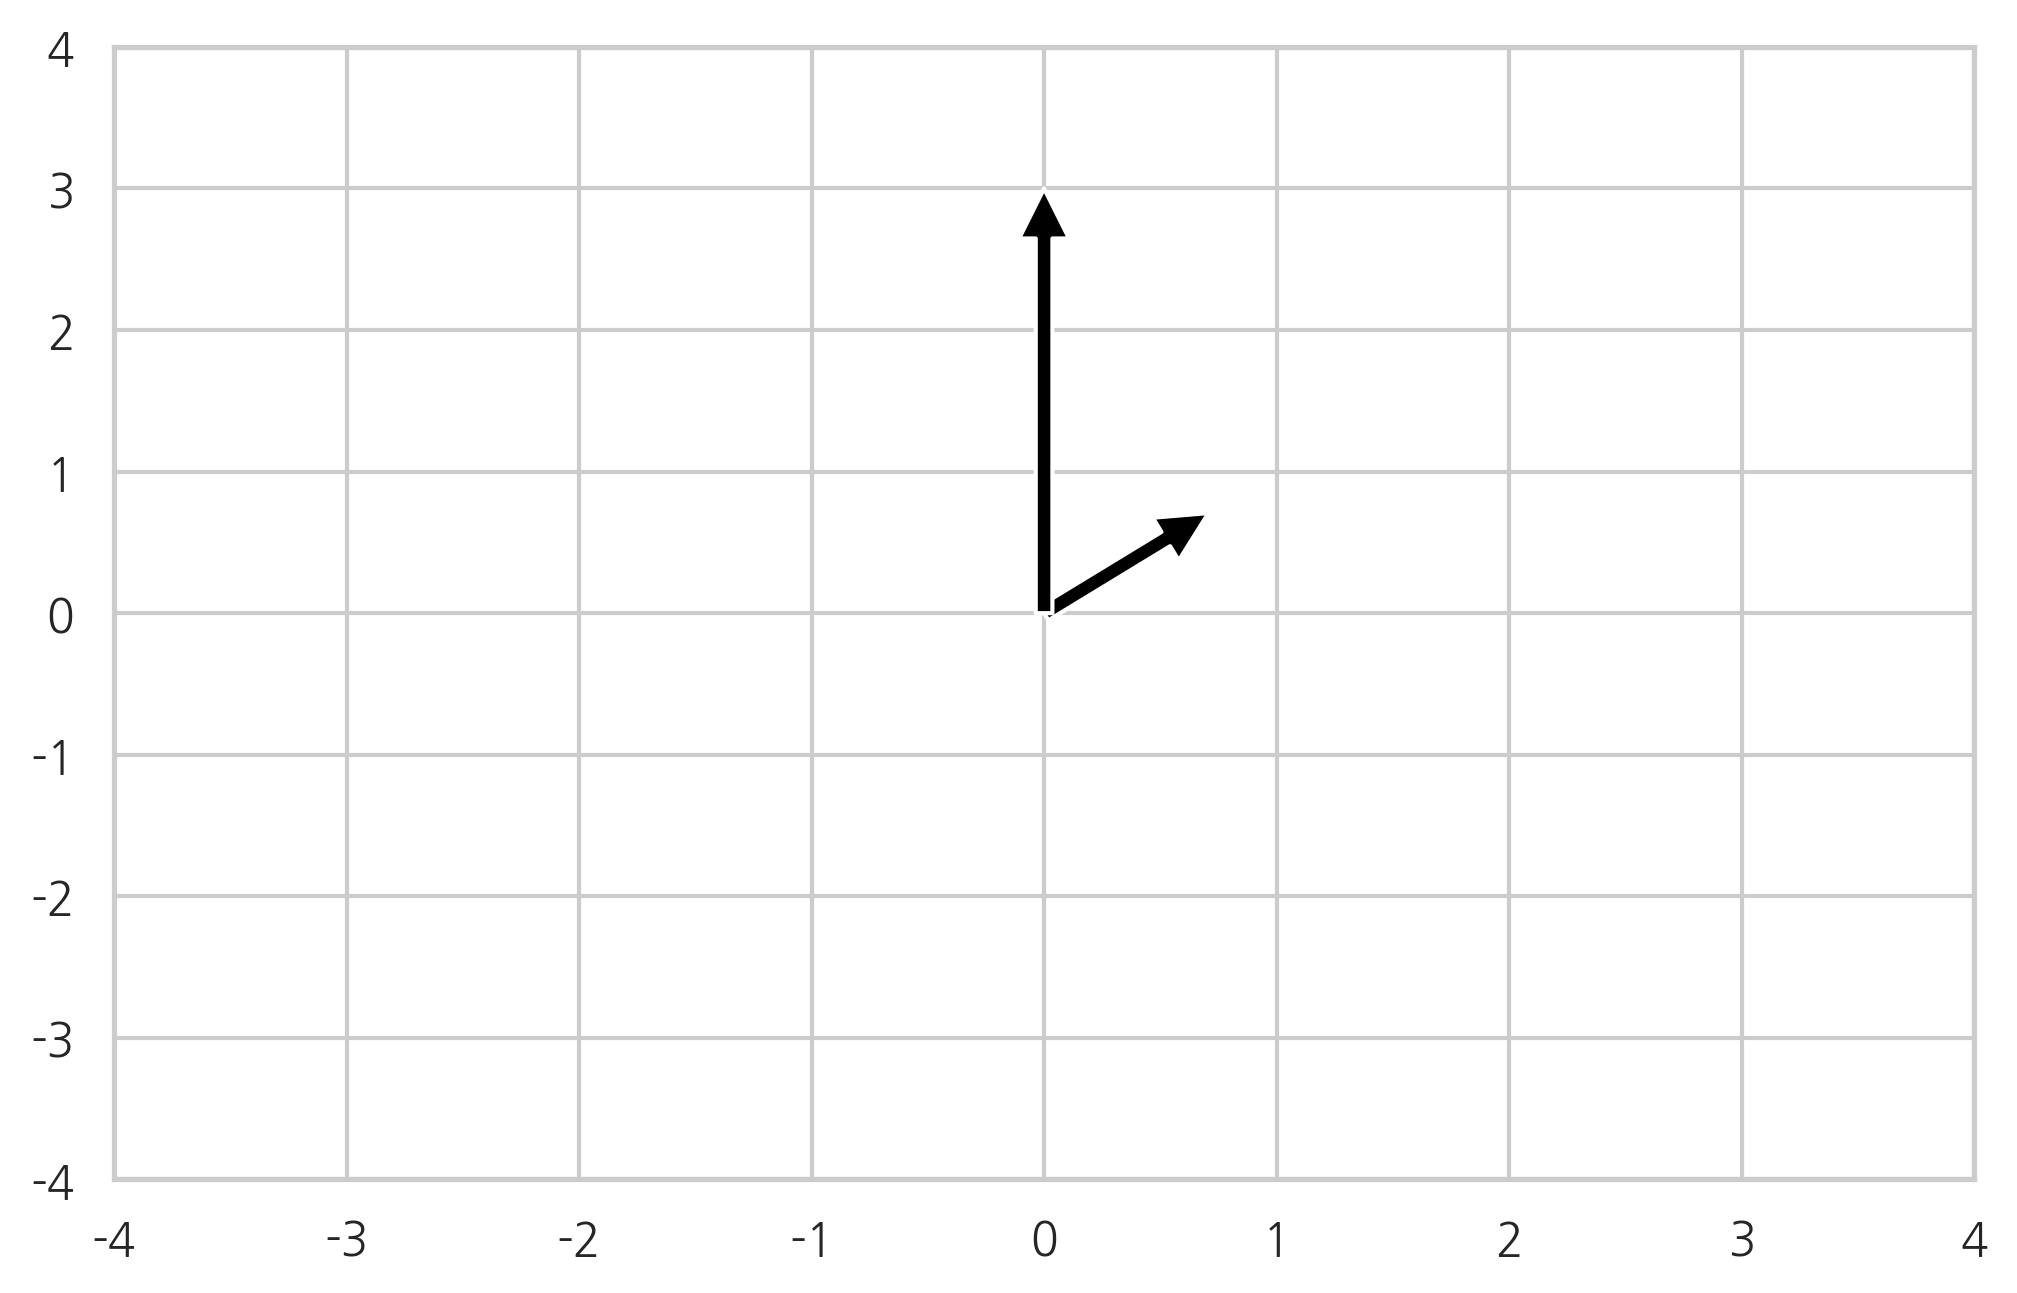

In [288]:
# 3.2.3 연습문제 

plt.ylim(-4,4)
plt.xlim(-4,4)

plt.annotate('', xy=[1/np.sqrt(2), 1/np.sqrt(2)], xytext=[0,0], arrowprops=black)
plt.annotate('', xy=[0,3], xytext=[0,0], arrowprops=black)

# 행렬 랭크

In [291]:
X1 = np.array([[1,3],[2,3]])
print(f'랭크 : {np.linalg.matrix_rank(X1)}')

랭크 : 2


In [293]:
# 연습문제 3.2.4
#1. 
A = np.array(
    [[1,5,6],
    [2,6,8],
    [3,11,14],
    [1,4,5]])
print(f'랭크 : {np.linalg.matrix_rank(A)}')
print('풀랭크 아니다')

랭크 : 2
풀랭크 아니다


In [296]:
#2. 
B = np.array(
    [[1,5,6],
    [2,6,8],
    [3,11,14],
    [1,4,8]])
print('랭크 : {}'.format(np.linalg.matrix_rank(B)))
print('풀랭크')

랭크 : 3
풀랭크


# 로우-랭크 행렬

In [313]:
A = np.array([[1,2],[3,4],[5,6]])

a1 = A[:,0].reshape(3,1)
a2 = A[:,1].reshape(3,1)

R2 = a1@a1.T+a2@a2.T

np.linalg.matrix_rank(R2)
R2

array([[ 5, 11, 17],
       [11, 25, 39],
       [17, 39, 61]])

In [321]:
r1 = R2[:,[0,1]]
r2 = R2[:,[0,2]]
r3 = R2[:,[1,2]]

print(np.linalg.matrix_rank(r1))
print(np.linalg.matrix_rank(r2))
print(np.linalg.matrix_rank(r3))

2
2
2


In [324]:
# 3.2.5 연습문제 
x1 = np.array([1,1]).reshape(2,1)
np.linalg.matrix_rank(x1@x1.T)

1

In [327]:
x1 = np.array([1,1]).reshape(2,1)
x2 = np.array([1,-1]).reshape(2,1)
print(np.linalg.matrix_rank(x1@x1.T+x2@x2.T))
print('풀랭크')

2
풀랭크


In [329]:
# 연습문제 3.2.6

B = np.array([[1,7],[3,8],[5,9]])
C = np.array([
    [1,4,7],
    [2,10,8],
    [3,6,9]
])

print(np.linalg.matrix_rank(B))
print(np.linalg.matrix_rank(C))

2
3


# 좌표변환

In [341]:
# 연습문제 3.2.8
x1 = np.array([[1],[0]])
x2 = np.array([[1],[2]])
x3 = np.array([[-1],[2]])

A = np.array([[1,-1],[0.75,0.75]])
T = np.linalg.inv(A)

print(T@x1)
print('\n')

print(T@x2)
print('\n')

print(T@x3)

[[ 0.5]
 [-0.5]]


[[1.83333333]
 [0.83333333]]


[[0.83333333]
 [1.83333333]]


(600.0, -800.0)

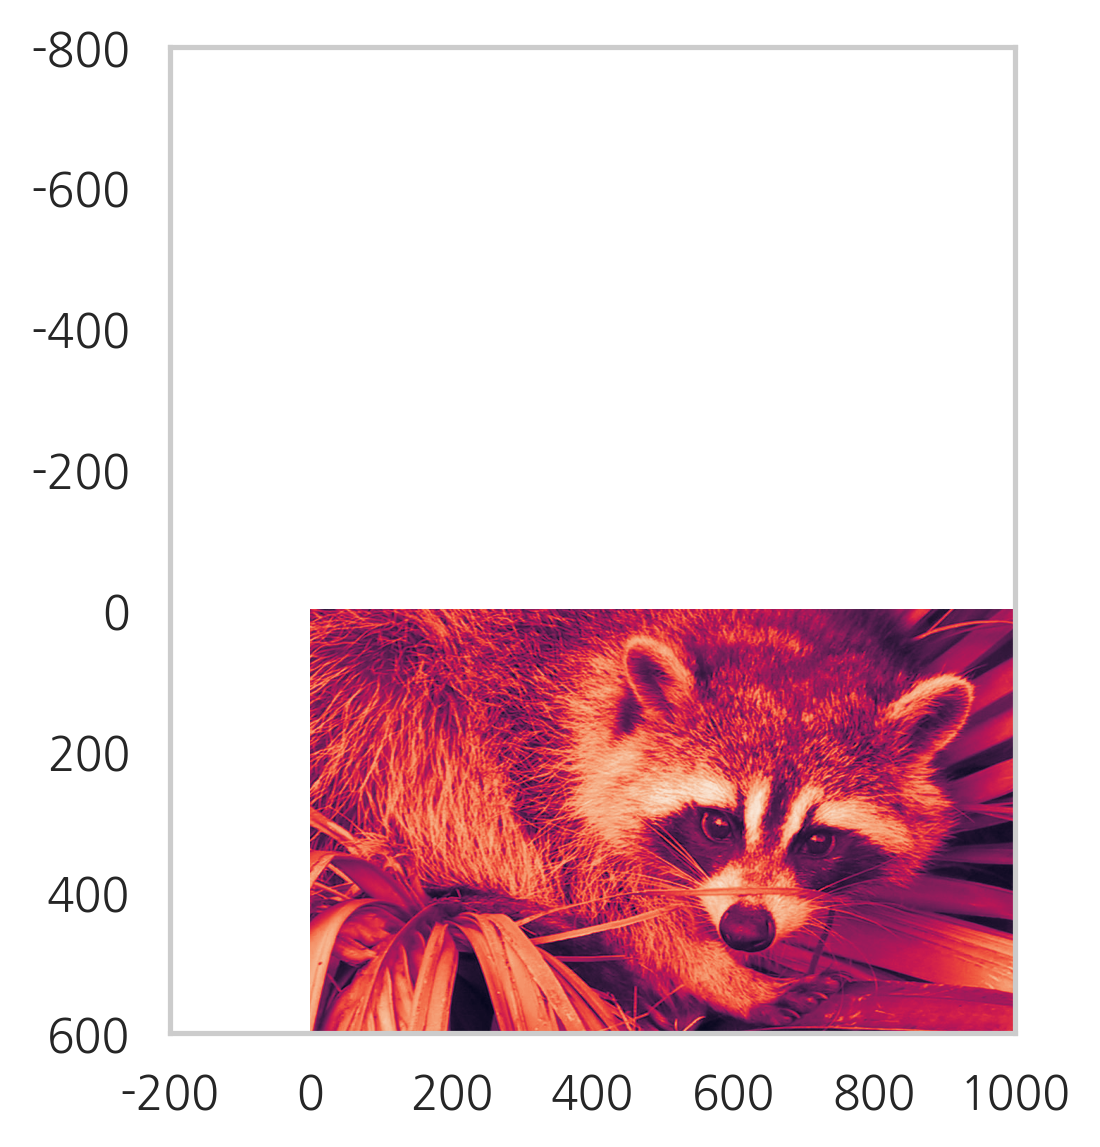

In [445]:
f = sp.misc.face(gray=True)
plt.subplot(121)
plt.imshow(f)

e1 = np.array([0,-1])
e2 = np.array([1,0])
E = np.vstack([e1, e2]).T
g1 = np.array([1,0.75])
g2 = np.array([-1, 0.75])
A = np.vstack([g1, g2]).T

plt.grid(False)
plt.xlim(-200, 1000)
plt.ylim(600, -800)
#plt.annotate('', xy=500*e2, xytext=[0,0], arrowprops={'facecolor' : 'green'})